## Modeling: Stacked LSTM
Company: Bharat Petroleum Corporation Ltd.,ENERGY,BPCL,EQ,INE029A01011 The VWAP (Volume Weighted Average Price) 
is the target variable to predict. VWAP is a trading benchmark used by traders that gives the average price the 
stock has traded at throughout the day, based on both volume and price. 
Reference: https://www.kaggle.com/sinjoysaha/stock-price-forecasting-using-stacked-lstm          

In [1]:
!ls

02-data_wrangling.ipynb        04-Modeling_VAR.ipynb
03-pre-processing.ipynb        04-modeling.ipynb
04-Modeling-Stacked_LSTM.ipynb BPCL.csv
04-Modeling_LSTM.ipynb         Capstone3-Colab.ipynb
04-Modeling_Prophet.ipynb      stock_market.csv


In [1]:
# Read the data
import pandas as pd
stock_market_data = pd.read_csv('stock_market.csv')
df = stock_market_data.drop(['Time.1'], axis = 1)
df.head(3)

,Time,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume
0,2000-01-03,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720,3.482029e+11,443175.0
1,2000-01-04,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820,8.573699e+11,443175.0
2,2000-01-05,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538,5.490785e+12,443175.0


In [3]:
# Install Tensorflow for Keras
!conda install -c anaconda tensorflow -y

Solving environment: done

# All requested packages already installed.



In [2]:
# Set the path
import sys
sys.path.append('/Users/elinorvelasquez/anaconda3/lib/python3.8/site-packages/')

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [4]:
df_VWAP = df.reset_index()['VWAP']
df_VWAP.tail()

5301    421.33
5302    420.45
5303    419.33
5304    420.00
5305    428.14
Name: VWAP, dtype: float64

In [7]:
df_VWAP.shape

(5306,)

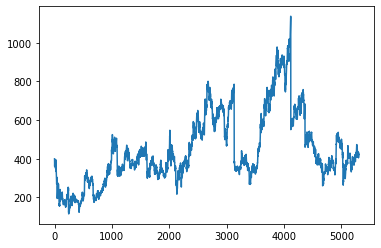

In [5]:
plt.plot(df_VWAP)
plt.show()

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
df_VWAP = scaler.fit_transform(np.array(df_VWAP).reshape(-1,1))

# Standardize the data for the neural network

In [10]:
df_VWAP.shape

(5306, 1)

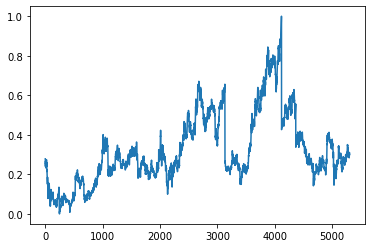

In [7]:
plt.plot(df_VWAP)
plt.show()

In [8]:
# train_test_split the data into training and test subsets
train_size = int(len(df_VWAP)*0.65)
test_size = len(df_VWAP) - train_size
train_data = df_VWAP[0:train_size,:]
test_data = df_VWAP[train_size:,:]

In [13]:
train_size, test_size
test_data.shape

(1858, 1)

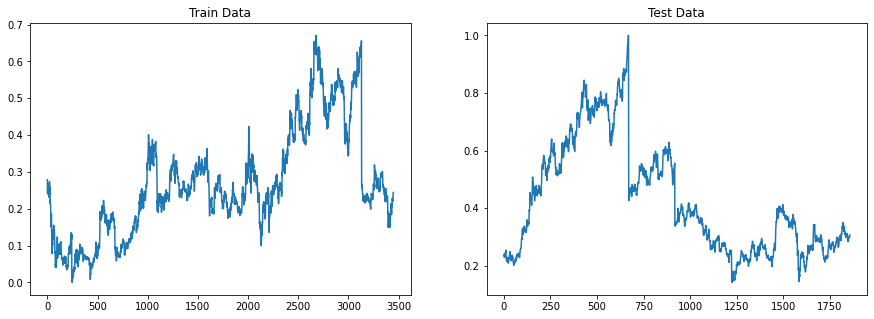

In [9]:
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(train_data)
plt.title('Train Data')
plt.subplot(122)
plt.plot(test_data)
plt.title('Test Data')
plt.show()

### Model

In [10]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        dataX.append(dataset[i:(i+time_step),0])
        dataY.append(dataset[(i+time_step),0])
    
    return np.array(dataX), np.array(dataY)

In [11]:
time_step = 100
train_x, train_y = create_dataset(train_data, time_step)
test_x, test_y = create_dataset(test_data, time_step)

In [17]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((3347, 100), (3347,), (1757, 100), (1757,))

In [12]:
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],1)

In [19]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((3347, 100, 1), (3347,), (1757, 100, 1), (1757,))

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [14]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_history = model.fit(train_x, train_y, 
                          validation_data=(test_x, test_y), 
                          epochs=100, batch_size=64)

Epoch 1/100
53/53 [==============================] - 10s 129ms/step - loss: 0.0233 - val_loss: 0.0027
Epoch 2/100
53/53 [==============================] - 6s 105ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 3/100
53/53 [==============================] - 5s 102ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 4/100
53/53 [==============================] - 5s 102ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 5/100
53/53 [==============================] - 6s 105ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 6/100
53/53 [==============================] - 5s 103ms/step - loss: 8.5570e-04 - val_loss: 0.0015
Epoch 7/100
53/53 [==============================] - 5s 102ms/step - loss: 7.7069e-04 - val_loss: 0.0016
Epoch 8/100
53/53 [==============================] - 5s 102ms/step - loss: 7.9733e-04 - val_loss: 0.0015
Epoch 9/100
53/53 [==============================] - 5s 103ms/step - loss: 5.7431e-04 - val_loss: 0.0013
Epoch 10/100
53/53 [==============================] - 5s 104ms/step - loss

53/53 [==============================] - 5s 102ms/step - loss: 1.2566e-04 - val_loss: 3.8099e-04
Epoch 77/100
53/53 [==============================] - 5s 102ms/step - loss: 1.4475e-04 - val_loss: 3.9533e-04
Epoch 78/100
53/53 [==============================] - 5s 102ms/step - loss: 1.1330e-04 - val_loss: 4.5542e-04
Epoch 79/100
53/53 [==============================] - 5s 102ms/step - loss: 2.0415e-04 - val_loss: 3.6494e-04
Epoch 80/100
53/53 [==============================] - 5s 103ms/step - loss: 1.1970e-04 - val_loss: 3.5941e-04
Epoch 81/100
53/53 [==============================] - 6s 105ms/step - loss: 1.1228e-04 - val_loss: 3.8586e-04
Epoch 82/100
53/53 [==============================] - 5s 102ms/step - loss: 2.1492e-04 - val_loss: 3.5600e-04
Epoch 83/100
53/53 [==============================] - 5s 102ms/step - loss: 8.9934e-05 - val_loss: 4.1935e-04
Epoch 84/100
53/53 [==============================] - 5s 103ms/step - loss: 1.5591e-04 - val_loss: 7.7742e-04
Epoch 85/100
53/53 [===

In [17]:
model_history.history.keys()

dict_keys(['loss', 'val_loss'])

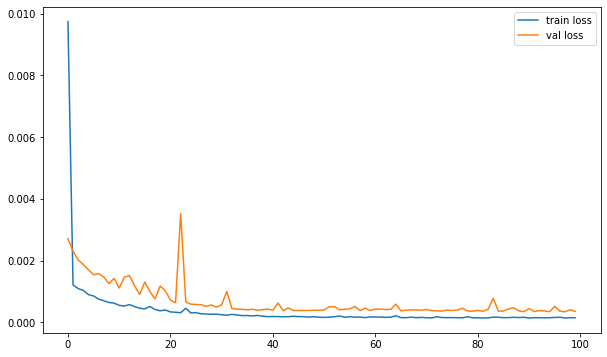

In [18]:
plt.figure(figsize=[10,6])
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

### Forecasting

In [19]:
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)
test_predict.shape

(1757, 1)

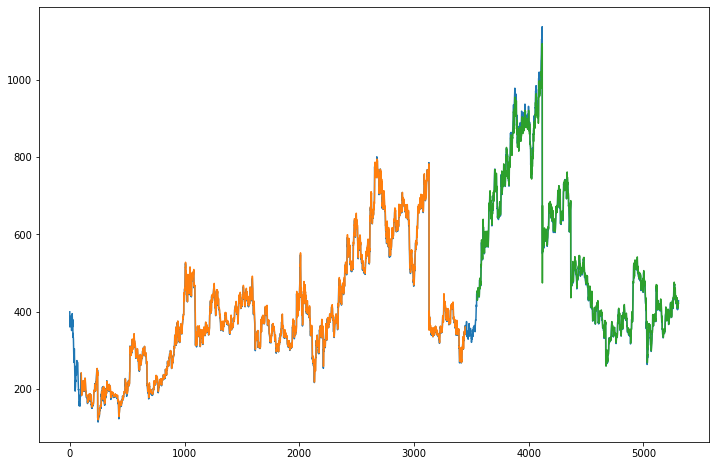

In [20]:
trainPredictPlot = np.empty_like(df_VWAP)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step,:] = train_predict

testPredictPlot = np.empty_like(df_VWAP)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (time_step*2) +1:len(df_VWAP)-1, :] = test_predict

plt.figure(figsize=[12,8])
plt.plot(scaler.inverse_transform(df_VWAP))
plt.plot(scaler.inverse_transform(trainPredictPlot))
plt.plot(scaler.inverse_transform(testPredictPlot))
plt.show()

### Predict next 100 days

In [21]:
x_input = test_data[0:100].reshape(1,-1)
x_input.shape

(1, 100)

In [22]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [23]:
output = []
days = 1758
for i in range(days):
    print('start')
    x_input = np.array(temp_input[i:])
    print(f'{i} day input {x_input}')    
    x_input = x_input.reshape((1, time_step, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat)
    temp_input.extend(yhat[0].tolist())
    output.extend(yhat[0].tolist())    

start
0 day input [0.23867202 0.23911195 0.22944345 0.22879823 0.23286506 0.23746957
 0.24103782 0.23815389 0.2439022  0.24956252 0.25414748 0.24114536
 0.23352983 0.22242426 0.22024421 0.21583522 0.22485849 0.2296292
 0.22908174 0.22086987 0.21459366 0.21225719 0.22713631 0.21329345
 0.20951012 0.21562014 0.22017577 0.22387111 0.22856361 0.23052859
 0.23996246 0.24248468 0.24905417 0.24047081 0.23018643 0.23153552
 0.22299127 0.2173505  0.22144666 0.22539617 0.21920795 0.22009756
 0.2297074  0.23155507 0.23685368 0.235094   0.22974651 0.23024509
 0.23030374 0.22688213 0.21246248 0.21266778 0.20656754 0.20153288
 0.20491539 0.20886491 0.21144578 0.21155331 0.20929505 0.21063437
 0.22022465 0.21969675 0.21909063 0.22219941 0.22714608 0.22484872
 0.21653909 0.220166   0.2336667  0.23003001 0.23943455 0.2379877
 0.23534817 0.23452699 0.23188746 0.23226872 0.23490825 0.23881866
 0.24421503 0.23699055 0.23433147 0.23578809 0.23641376 0.23194611
 0.22841697 0.23766509 0.24408795 0.25032505 0

[[0.3469068]]
start
10 day input [0.25414748 0.24114536 0.23352983 0.22242426 0.22024421 0.21583522
 0.22485849 0.2296292  0.22908174 0.22086987 0.21459366 0.21225719
 0.22713631 0.21329345 0.20951012 0.21562014 0.22017577 0.22387111
 0.22856361 0.23052859 0.23996246 0.24248468 0.24905417 0.24047081
 0.23018643 0.23153552 0.22299127 0.2173505  0.22144666 0.22539617
 0.21920795 0.22009756 0.2297074  0.23155507 0.23685368 0.235094
 0.22974651 0.23024509 0.23030374 0.22688213 0.21246248 0.21266778
 0.20656754 0.20153288 0.20491539 0.20886491 0.21144578 0.21155331
 0.20929505 0.21063437 0.22022465 0.21969675 0.21909063 0.22219941
 0.22714608 0.22484872 0.21653909 0.220166   0.2336667  0.23003001
 0.23943455 0.2379877  0.23534817 0.23452699 0.23188746 0.23226872
 0.23490825 0.23881866 0.24421503 0.23699055 0.23433147 0.23578809
 0.23641376 0.23194611 0.22841697 0.23766509 0.24408795 0.25032505
 0.25637642 0.25861513 0.25735402 0.25933855 0.26341516 0.27460871
 0.29097379 0.2963115  0.295949

[[0.37171018]]
start
20 day input [0.21459366 0.21225719 0.22713631 0.21329345 0.20951012 0.21562014
 0.22017577 0.22387111 0.22856361 0.23052859 0.23996246 0.24248468
 0.24905417 0.24047081 0.23018643 0.23153552 0.22299127 0.2173505
 0.22144666 0.22539617 0.21920795 0.22009756 0.2297074  0.23155507
 0.23685368 0.235094   0.22974651 0.23024509 0.23030374 0.22688213
 0.21246248 0.21266778 0.20656754 0.20153288 0.20491539 0.20886491
 0.21144578 0.21155331 0.20929505 0.21063437 0.22022465 0.21969675
 0.21909063 0.22219941 0.22714608 0.22484872 0.21653909 0.220166
 0.2336667  0.23003001 0.23943455 0.2379877  0.23534817 0.23452699
 0.23188746 0.23226872 0.23490825 0.23881866 0.24421503 0.23699055
 0.23433147 0.23578809 0.23641376 0.23194611 0.22841697 0.23766509
 0.24408795 0.25032505 0.25637642 0.25861513 0.25735402 0.25933855
 0.26341516 0.27460871 0.29097379 0.2963115  0.29594979 0.2917461
 0.32413409 0.32480863 0.32880682 0.33118379 0.33287206 0.33447042
 0.33621469 0.33814743 0.3402326

[[0.40237835]]
start
30 day input [0.23996246 0.24248468 0.24905417 0.24047081 0.23018643 0.23153552
 0.22299127 0.2173505  0.22144666 0.22539617 0.21920795 0.22009756
 0.2297074  0.23155507 0.23685368 0.235094   0.22974651 0.23024509
 0.23030374 0.22688213 0.21246248 0.21266778 0.20656754 0.20153288
 0.20491539 0.20886491 0.21144578 0.21155331 0.20929505 0.21063437
 0.22022465 0.21969675 0.21909063 0.22219941 0.22714608 0.22484872
 0.21653909 0.220166   0.2336667  0.23003001 0.23943455 0.2379877
 0.23534817 0.23452699 0.23188746 0.23226872 0.23490825 0.23881866
 0.24421503 0.23699055 0.23433147 0.23578809 0.23641376 0.23194611
 0.22841697 0.23766509 0.24408795 0.25032505 0.25637642 0.25861513
 0.25735402 0.25933855 0.26341516 0.27460871 0.29097379 0.2963115
 0.29594979 0.2917461  0.32413409 0.32480863 0.32880682 0.33118379
 0.33287206 0.33447042 0.33621469 0.33814743 0.34023267 0.34241498
 0.34464863 0.34690681 0.34918097 0.35147506 0.3537997  0.35616723
 0.35858914 0.36107403 0.36362

[[0.4361665]]
start
40 day input [0.21920795 0.22009756 0.2297074  0.23155507 0.23685368 0.235094
 0.22974651 0.23024509 0.23030374 0.22688213 0.21246248 0.21266778
 0.20656754 0.20153288 0.20491539 0.20886491 0.21144578 0.21155331
 0.20929505 0.21063437 0.22022465 0.21969675 0.21909063 0.22219941
 0.22714608 0.22484872 0.21653909 0.220166   0.2336667  0.23003001
 0.23943455 0.2379877  0.23534817 0.23452699 0.23188746 0.23226872
 0.23490825 0.23881866 0.24421503 0.23699055 0.23433147 0.23578809
 0.23641376 0.23194611 0.22841697 0.23766509 0.24408795 0.25032505
 0.25637642 0.25861513 0.25735402 0.25933855 0.26341516 0.27460871
 0.29097379 0.2963115  0.29594979 0.2917461  0.32413409 0.32480863
 0.32880682 0.33118379 0.33287206 0.33447042 0.33621469 0.33814743
 0.34023267 0.34241498 0.34464863 0.34690681 0.34918097 0.35147506
 0.3537997  0.35616723 0.35858914 0.36107403 0.36362725 0.36625114
 0.36894602 0.37171018 0.37454063 0.37743387 0.38038629 0.38339376
 0.38645232 0.38955799 0.392706

[[0.47051316]]
start
50 day input [0.21246248 0.21266778 0.20656754 0.20153288 0.20491539 0.20886491
 0.21144578 0.21155331 0.20929505 0.21063437 0.22022465 0.21969675
 0.21909063 0.22219941 0.22714608 0.22484872 0.21653909 0.220166
 0.2336667  0.23003001 0.23943455 0.2379877  0.23534817 0.23452699
 0.23188746 0.23226872 0.23490825 0.23881866 0.24421503 0.23699055
 0.23433147 0.23578809 0.23641376 0.23194611 0.22841697 0.23766509
 0.24408795 0.25032505 0.25637642 0.25861513 0.25735402 0.25933855
 0.26341516 0.27460871 0.29097379 0.2963115  0.29594979 0.2917461
 0.32413409 0.32480863 0.32880682 0.33118379 0.33287206 0.33447042
 0.33621469 0.33814743 0.34023267 0.34241498 0.34464863 0.34690681
 0.34918097 0.35147506 0.3537997  0.35616723 0.35858914 0.36107403
 0.36362725 0.36625114 0.36894602 0.37171018 0.37454063 0.37743387
 0.38038629 0.38339376 0.38645232 0.38955799 0.39270693 0.3958956
 0.39912042 0.40237835 0.40566611 0.40898097 0.41231996 0.41568065
 0.41906047 0.42245713 0.4258683

[[0.50308686]]
start
60 day input [0.22022465 0.21969675 0.21909063 0.22219941 0.22714608 0.22484872
 0.21653909 0.220166   0.2336667  0.23003001 0.23943455 0.2379877
 0.23534817 0.23452699 0.23188746 0.23226872 0.23490825 0.23881866
 0.24421503 0.23699055 0.23433147 0.23578809 0.23641376 0.23194611
 0.22841697 0.23766509 0.24408795 0.25032505 0.25637642 0.25861513
 0.25735402 0.25933855 0.26341516 0.27460871 0.29097379 0.2963115
 0.29594979 0.2917461  0.32413409 0.32480863 0.32880682 0.33118379
 0.33287206 0.33447042 0.33621469 0.33814743 0.34023267 0.34241498
 0.34464863 0.34690681 0.34918097 0.35147506 0.3537997  0.35616723
 0.35858914 0.36107403 0.36362725 0.36625114 0.36894602 0.37171018
 0.37454063 0.37743387 0.38038629 0.38339376 0.38645232 0.38955799
 0.39270693 0.3958956  0.39912042 0.40237835 0.40566611 0.40898097
 0.41231996 0.41568065 0.41906047 0.42245713 0.42586839 0.42929178
 0.43272522 0.4361665  0.43961337 0.44306362 0.44651499 0.44996524
 0.45341212 0.45685336 0.46028

[[0.53427094]]
start
71 day input [0.2379877  0.23534817 0.23452699 0.23188746 0.23226872 0.23490825
 0.23881866 0.24421503 0.23699055 0.23433147 0.23578809 0.23641376
 0.23194611 0.22841697 0.23766509 0.24408795 0.25032505 0.25637642
 0.25861513 0.25735402 0.25933855 0.26341516 0.27460871 0.29097379
 0.2963115  0.29594979 0.2917461  0.32413409 0.32480863 0.32880682
 0.33118379 0.33287206 0.33447042 0.33621469 0.33814743 0.34023267
 0.34241498 0.34464863 0.34690681 0.34918097 0.35147506 0.3537997
 0.35616723 0.35858914 0.36107403 0.36362725 0.36625114 0.36894602
 0.37171018 0.37454063 0.37743387 0.38038629 0.38339376 0.38645232
 0.38955799 0.39270693 0.3958956  0.39912042 0.40237835 0.40566611
 0.40898097 0.41231996 0.41568065 0.41906047 0.42245713 0.42586839
 0.42929178 0.43272522 0.4361665  0.43961337 0.44306362 0.44651499
 0.44996524 0.45341212 0.45685336 0.46028638 0.463709   0.46711865
 0.47051316 0.4738898  0.47724617 0.48058    0.48388892 0.48717043
 0.49042213 0.49364188 0.4968

[[0.5608876]]
start
83 day input [0.23194611 0.22841697 0.23766509 0.24408795 0.25032505 0.25637642
 0.25861513 0.25735402 0.25933855 0.26341516 0.27460871 0.29097379
 0.2963115  0.29594979 0.2917461  0.32413409 0.32480863 0.32880682
 0.33118379 0.33287206 0.33447042 0.33621469 0.33814743 0.34023267
 0.34241498 0.34464863 0.34690681 0.34918097 0.35147506 0.3537997
 0.35616723 0.35858914 0.36107403 0.36362725 0.36625114 0.36894602
 0.37171018 0.37454063 0.37743387 0.38038629 0.38339376 0.38645232
 0.38955799 0.39270693 0.3958956  0.39912042 0.40237835 0.40566611
 0.40898097 0.41231996 0.41568065 0.41906047 0.42245713 0.42586839
 0.42929178 0.43272522 0.4361665  0.43961337 0.44306362 0.44651499
 0.44996524 0.45341212 0.45685336 0.46028638 0.463709   0.46711865
 0.47051316 0.4738898  0.47724617 0.48058    0.48388892 0.48717043
 0.49042213 0.49364188 0.49682736 0.49997637 0.50308686 0.50615686
 0.50918472 0.51216829 0.51510608 0.51799631 0.52083772 0.52362901
 0.5263688  0.52905637 0.53169

[[0.57852644]]
start
94 day input [0.29097379 0.2963115  0.29594979 0.2917461  0.32413409 0.32480863
 0.32880682 0.33118379 0.33287206 0.33447042 0.33621469 0.33814743
 0.34023267 0.34241498 0.34464863 0.34690681 0.34918097 0.35147506
 0.3537997  0.35616723 0.35858914 0.36107403 0.36362725 0.36625114
 0.36894602 0.37171018 0.37454063 0.37743387 0.38038629 0.38339376
 0.38645232 0.38955799 0.39270693 0.3958956  0.39912042 0.40237835
 0.40566611 0.40898097 0.41231996 0.41568065 0.41906047 0.42245713
 0.42586839 0.42929178 0.43272522 0.4361665  0.43961337 0.44306362
 0.44651499 0.44996524 0.45341212 0.45685336 0.46028638 0.463709
 0.46711865 0.47051316 0.4738898  0.47724617 0.48058    0.48388892
 0.48717043 0.49042213 0.49364188 0.49682736 0.49997637 0.50308686
 0.50615686 0.50918472 0.51216829 0.51510608 0.51799631 0.52083772
 0.52362901 0.5263688  0.52905637 0.53169078 0.53427094 0.53679627
 0.53926605 0.54168028 0.54403853 0.54634047 0.54858619 0.55077565
 0.55290896 0.55498624 0.55700

[[0.5898817]]
start
104 day input [0.33621469 0.33814743 0.34023267 0.34241498 0.34464863 0.34690681
 0.34918097 0.35147506 0.3537997  0.35616723 0.35858914 0.36107403
 0.36362725 0.36625114 0.36894602 0.37171018 0.37454063 0.37743387
 0.38038629 0.38339376 0.38645232 0.38955799 0.39270693 0.3958956
 0.39912042 0.40237835 0.40566611 0.40898097 0.41231996 0.41568065
 0.41906047 0.42245713 0.42586839 0.42929178 0.43272522 0.4361665
 0.43961337 0.44306362 0.44651499 0.44996524 0.45341212 0.45685336
 0.46028638 0.463709   0.46711865 0.47051316 0.4738898  0.47724617
 0.48058    0.48388892 0.48717043 0.49042213 0.49364188 0.49682736
 0.49997637 0.50308686 0.50615686 0.50918472 0.51216829 0.51510608
 0.51799631 0.52083772 0.52362901 0.5263688  0.52905637 0.53169078
 0.53427094 0.53679627 0.53926605 0.54168028 0.54403853 0.54634047
 0.54858619 0.55077565 0.55290896 0.55498624 0.55700821 0.55897522
 0.56088758 0.56274581 0.56455064 0.5663029  0.5680033  0.56965244
 0.57125151 0.57280117 0.57430

[[0.5990992]]
start
116 day input [0.36362725 0.36625114 0.36894602 0.37171018 0.37454063 0.37743387
 0.38038629 0.38339376 0.38645232 0.38955799 0.39270693 0.3958956
 0.39912042 0.40237835 0.40566611 0.40898097 0.41231996 0.41568065
 0.41906047 0.42245713 0.42586839 0.42929178 0.43272522 0.4361665
 0.43961337 0.44306362 0.44651499 0.44996524 0.45341212 0.45685336
 0.46028638 0.463709   0.46711865 0.47051316 0.4738898  0.47724617
 0.48058    0.48388892 0.48717043 0.49042213 0.49364188 0.49682736
 0.49997637 0.50308686 0.50615686 0.50918472 0.51216829 0.51510608
 0.51799631 0.52083772 0.52362901 0.5263688  0.52905637 0.53169078
 0.53427094 0.53679627 0.53926605 0.54168028 0.54403853 0.54634047
 0.54858619 0.55077565 0.55290896 0.55498624 0.55700821 0.55897522
 0.56088758 0.56274581 0.56455064 0.5663029  0.5680033  0.56965244
 0.57125151 0.57280117 0.57430255 0.57575661 0.57716429 0.57852644
 0.57984418 0.5811187  0.58235103 0.58354205 0.5846929  0.58580446
 0.5868783  0.58791512 0.58891

[[0.604964]]
start
128 day input [0.39912042 0.40237835 0.40566611 0.40898097 0.41231996 0.41568065
 0.41906047 0.42245713 0.42586839 0.42929178 0.43272522 0.4361665
 0.43961337 0.44306362 0.44651499 0.44996524 0.45341212 0.45685336
 0.46028638 0.463709   0.46711865 0.47051316 0.4738898  0.47724617
 0.48058    0.48388892 0.48717043 0.49042213 0.49364188 0.49682736
 0.49997637 0.50308686 0.50615686 0.50918472 0.51216829 0.51510608
 0.51799631 0.52083772 0.52362901 0.5263688  0.52905637 0.53169078
 0.53427094 0.53679627 0.53926605 0.54168028 0.54403853 0.54634047
 0.54858619 0.55077565 0.55290896 0.55498624 0.55700821 0.55897522
 0.56088758 0.56274581 0.56455064 0.5663029  0.5680033  0.56965244
 0.57125151 0.57280117 0.57430255 0.57575661 0.57716429 0.57852644
 0.57984418 0.5811187  0.58235103 0.58354205 0.5846929  0.58580446
 0.5868783  0.58791512 0.58891582 0.58988172 0.59081358 0.59171247
 0.59257954 0.59341562 0.59422141 0.59499842 0.59574735 0.59646875
 0.59716368 0.59783328 0.59847

[[0.6086384]]
start
140 day input [0.43961337 0.44306362 0.44651499 0.44996524 0.45341212 0.45685336
 0.46028638 0.463709   0.46711865 0.47051316 0.4738898  0.47724617
 0.48058    0.48388892 0.48717043 0.49042213 0.49364188 0.49682736
 0.49997637 0.50308686 0.50615686 0.50918472 0.51216829 0.51510608
 0.51799631 0.52083772 0.52362901 0.5263688  0.52905637 0.53169078
 0.53427094 0.53679627 0.53926605 0.54168028 0.54403853 0.54634047
 0.54858619 0.55077565 0.55290896 0.55498624 0.55700821 0.55897522
 0.56088758 0.56274581 0.56455064 0.5663029  0.5680033  0.56965244
 0.57125151 0.57280117 0.57430255 0.57575661 0.57716429 0.57852644
 0.57984418 0.5811187  0.58235103 0.58354205 0.5846929  0.58580446
 0.5868783  0.58791512 0.58891582 0.58988172 0.59081358 0.59171247
 0.59257954 0.59341562 0.59422141 0.59499842 0.59574735 0.59646875
 0.59716368 0.59783328 0.59847832 0.59909922 0.59969729 0.60027325
 0.60082757 0.60136116 0.60187465 0.60236865 0.60284406 0.60330135
 0.60374147 0.60416502 0.604

[[0.6109179]]
start
152 day input [0.48058    0.48388892 0.48717043 0.49042213 0.49364188 0.49682736
 0.49997637 0.50308686 0.50615686 0.50918472 0.51216829 0.51510608
 0.51799631 0.52083772 0.52362901 0.5263688  0.52905637 0.53169078
 0.53427094 0.53679627 0.53926605 0.54168028 0.54403853 0.54634047
 0.54858619 0.55077565 0.55290896 0.55498624 0.55700821 0.55897522
 0.56088758 0.56274581 0.56455064 0.5663029  0.5680033  0.56965244
 0.57125151 0.57280117 0.57430255 0.57575661 0.57716429 0.57852644
 0.57984418 0.5811187  0.58235103 0.58354205 0.5846929  0.58580446
 0.5868783  0.58791512 0.58891582 0.58988172 0.59081358 0.59171247
 0.59257954 0.59341562 0.59422141 0.59499842 0.59574735 0.59646875
 0.59716368 0.59783328 0.59847832 0.59909922 0.59969729 0.60027325
 0.60082757 0.60136116 0.60187465 0.60236865 0.60284406 0.60330135
 0.60374147 0.60416502 0.6045723  0.60496402 0.60534084 0.605703
 0.60605139 0.60638613 0.60670805 0.6070177  0.60731506 0.60760093
 0.60787582 0.60814011 0.60839

[[0.61223054]]
start
163 day input [0.51510608 0.51799631 0.52083772 0.52362901 0.5263688  0.52905637
 0.53169078 0.53427094 0.53679627 0.53926605 0.54168028 0.54403853
 0.54634047 0.54858619 0.55077565 0.55290896 0.55498624 0.55700821
 0.55897522 0.56088758 0.56274581 0.56455064 0.5663029  0.5680033
 0.56965244 0.57125151 0.57280117 0.57430255 0.57575661 0.57716429
 0.57852644 0.57984418 0.5811187  0.58235103 0.58354205 0.5846929
 0.58580446 0.5868783  0.58791512 0.58891582 0.58988172 0.59081358
 0.59171247 0.59257954 0.59341562 0.59422141 0.59499842 0.59574735
 0.59646875 0.59716368 0.59783328 0.59847832 0.59909922 0.59969729
 0.60027325 0.60082757 0.60136116 0.60187465 0.60236865 0.60284406
 0.60330135 0.60374147 0.60416502 0.6045723  0.60496402 0.60534084
 0.605703   0.60605139 0.60638613 0.60670805 0.6070177  0.60731506
 0.60760093 0.60787582 0.60814011 0.60839421 0.60863841 0.60887277
 0.60909802 0.60931456 0.60952258 0.60972244 0.60991454 0.61009902
 0.61027622 0.61044651 0.6106

[[0.61313045]]
start
175 day input [0.54634047 0.54858619 0.55077565 0.55290896 0.55498624 0.55700821
 0.55897522 0.56088758 0.56274581 0.56455064 0.5663029  0.5680033
 0.56965244 0.57125151 0.57280117 0.57430255 0.57575661 0.57716429
 0.57852644 0.57984418 0.5811187  0.58235103 0.58354205 0.5846929
 0.58580446 0.5868783  0.58791512 0.58891582 0.58988172 0.59081358
 0.59171247 0.59257954 0.59341562 0.59422141 0.59499842 0.59574735
 0.59646875 0.59716368 0.59783328 0.59847832 0.59909922 0.59969729
 0.60027325 0.60082757 0.60136116 0.60187465 0.60236865 0.60284406
 0.60330135 0.60374147 0.60416502 0.6045723  0.60496402 0.60534084
 0.605703   0.60605139 0.60638613 0.60670805 0.6070177  0.60731506
 0.60760093 0.60787582 0.60814011 0.60839421 0.60863841 0.60887277
 0.60909802 0.60931456 0.60952258 0.60972244 0.60991454 0.61009902
 0.61027622 0.61044651 0.61060989 0.61076707 0.61091793 0.61106265
 0.61120176 0.61133534 0.61146379 0.61158711 0.61170554 0.61181921
 0.61192846 0.61203343 0.6121

[[0.61368257]]
start
187 day input [0.56965244 0.57125151 0.57280117 0.57430255 0.57575661 0.57716429
 0.57852644 0.57984418 0.5811187  0.58235103 0.58354205 0.5846929
 0.58580446 0.5868783  0.58791512 0.58891582 0.58988172 0.59081358
 0.59171247 0.59257954 0.59341562 0.59422141 0.59499842 0.59574735
 0.59646875 0.59716368 0.59783328 0.59847832 0.59909922 0.59969729
 0.60027325 0.60082757 0.60136116 0.60187465 0.60236865 0.60284406
 0.60330135 0.60374147 0.60416502 0.6045723  0.60496402 0.60534084
 0.605703   0.60605139 0.60638613 0.60670805 0.6070177  0.60731506
 0.60760093 0.60787582 0.60814011 0.60839421 0.60863841 0.60887277
 0.60909802 0.60931456 0.60952258 0.60972244 0.60991454 0.61009902
 0.61027622 0.61044651 0.61060989 0.61076707 0.61091793 0.61106265
 0.61120176 0.61133534 0.61146379 0.61158711 0.61170554 0.61181921
 0.61192846 0.61203343 0.61213392 0.61223054 0.61232352 0.61241263
 0.6124981  0.61258036 0.61265928 0.61273497 0.61280787 0.61287785
 0.61294502 0.61300945 0.613

[[0.61402065]]
start
199 day input [0.58580446 0.5868783  0.58791512 0.58891582 0.58988172 0.59081358
 0.59171247 0.59257954 0.59341562 0.59422141 0.59499842 0.59574735
 0.59646875 0.59716368 0.59783328 0.59847832 0.59909922 0.59969729
 0.60027325 0.60082757 0.60136116 0.60187465 0.60236865 0.60284406
 0.60330135 0.60374147 0.60416502 0.6045723  0.60496402 0.60534084
 0.605703   0.60605139 0.60638613 0.60670805 0.6070177  0.60731506
 0.60760093 0.60787582 0.60814011 0.60839421 0.60863841 0.60887277
 0.60909802 0.60931456 0.60952258 0.60972244 0.60991454 0.61009902
 0.61027622 0.61044651 0.61060989 0.61076707 0.61091793 0.61106265
 0.61120176 0.61133534 0.61146379 0.61158711 0.61170554 0.61181921
 0.61192846 0.61203343 0.61213392 0.61223054 0.61232352 0.61241263
 0.6124981  0.61258036 0.61265928 0.61273497 0.61280787 0.61287785
 0.61294502 0.61300945 0.61307108 0.61313045 0.61318755 0.61324233
 0.61329478 0.61334521 0.61339372 0.61344016 0.61348468 0.6135276
 0.61356866 0.61360812 0.613

[[0.6142139]]
start
210 day input [0.59574735 0.59646875 0.59716368 0.59783328 0.59847832 0.59909922
 0.59969729 0.60027325 0.60082757 0.60136116 0.60187465 0.60236865
 0.60284406 0.60330135 0.60374147 0.60416502 0.6045723  0.60496402
 0.60534084 0.605703   0.60605139 0.60638613 0.60670805 0.6070177
 0.60731506 0.60760093 0.60787582 0.60814011 0.60839421 0.60863841
 0.60887277 0.60909802 0.60931456 0.60952258 0.60972244 0.60991454
 0.61009902 0.61027622 0.61044651 0.61060989 0.61076707 0.61091793
 0.61106265 0.61120176 0.61133534 0.61146379 0.61158711 0.61170554
 0.61181921 0.61192846 0.61203343 0.61213392 0.61223054 0.61232352
 0.61241263 0.6124981  0.61258036 0.61265928 0.61273497 0.61280787
 0.61287785 0.61294502 0.61300945 0.61307108 0.61313045 0.61318755
 0.61324233 0.61329478 0.61334521 0.61339372 0.61344016 0.61348468
 0.6135276  0.61356866 0.61360812 0.61364609 0.61368257 0.6137175
 0.61375099 0.61378306 0.61381376 0.61384344 0.61387217 0.61389977
 0.61392587 0.61395103 0.61397

[[0.61434543]]
start
222 day input [0.60284406 0.60330135 0.60374147 0.60416502 0.6045723  0.60496402
 0.60534084 0.605703   0.60605139 0.60638613 0.60670805 0.6070177
 0.60731506 0.60760093 0.60787582 0.60814011 0.60839421 0.60863841
 0.60887277 0.60909802 0.60931456 0.60952258 0.60972244 0.60991454
 0.61009902 0.61027622 0.61044651 0.61060989 0.61076707 0.61091793
 0.61106265 0.61120176 0.61133534 0.61146379 0.61158711 0.61170554
 0.61181921 0.61192846 0.61203343 0.61213392 0.61223054 0.61232352
 0.61241263 0.6124981  0.61258036 0.61265928 0.61273497 0.61280787
 0.61287785 0.61294502 0.61300945 0.61307108 0.61313045 0.61318755
 0.61324233 0.61329478 0.61334521 0.61339372 0.61344016 0.61348468
 0.6135276  0.61356866 0.61360812 0.61364609 0.61368257 0.6137175
 0.61375099 0.61378306 0.61381376 0.61384344 0.61387217 0.61389977
 0.61392587 0.61395103 0.61397535 0.61399841 0.61402065 0.61404192
 0.61406261 0.61408222 0.61410129 0.61411941 0.61413676 0.61415339
 0.61416948 0.61418498 0.6141

[[0.6144263]]
start
234 day input [0.60731506 0.60760093 0.60787582 0.60814011 0.60839421 0.60863841
 0.60887277 0.60909802 0.60931456 0.60952258 0.60972244 0.60991454
 0.61009902 0.61027622 0.61044651 0.61060989 0.61076707 0.61091793
 0.61106265 0.61120176 0.61133534 0.61146379 0.61158711 0.61170554
 0.61181921 0.61192846 0.61203343 0.61213392 0.61223054 0.61232352
 0.61241263 0.6124981  0.61258036 0.61265928 0.61273497 0.61280787
 0.61287785 0.61294502 0.61300945 0.61307108 0.61313045 0.61318755
 0.61324233 0.61329478 0.61334521 0.61339372 0.61344016 0.61348468
 0.6135276  0.61356866 0.61360812 0.61364609 0.61368257 0.6137175
 0.61375099 0.61378306 0.61381376 0.61384344 0.61387217 0.61389977
 0.61392587 0.61395103 0.61397535 0.61399841 0.61402065 0.61404192
 0.61406261 0.61408222 0.61410129 0.61411941 0.61413676 0.61415339
 0.61416948 0.61418498 0.61419976 0.61421388 0.61422753 0.61424077
 0.61425328 0.61426526 0.61427671 0.61428785 0.61429834 0.61430854
 0.61431843 0.61432773 0.6143

[[0.61447513]]
start
246 day input [0.61009902 0.61027622 0.61044651 0.61060989 0.61076707 0.61091793
 0.61106265 0.61120176 0.61133534 0.61146379 0.61158711 0.61170554
 0.61181921 0.61192846 0.61203343 0.61213392 0.61223054 0.61232352
 0.61241263 0.6124981  0.61258036 0.61265928 0.61273497 0.61280787
 0.61287785 0.61294502 0.61300945 0.61307108 0.61313045 0.61318755
 0.61324233 0.61329478 0.61334521 0.61339372 0.61344016 0.61348468
 0.6135276  0.61356866 0.61360812 0.61364609 0.61368257 0.6137175
 0.61375099 0.61378306 0.61381376 0.61384344 0.61387217 0.61389977
 0.61392587 0.61395103 0.61397535 0.61399841 0.61402065 0.61404192
 0.61406261 0.61408222 0.61410129 0.61411941 0.61413676 0.61415339
 0.61416948 0.61418498 0.61419976 0.61421388 0.61422753 0.61424077
 0.61425328 0.61426526 0.61427671 0.61428785 0.61429834 0.61430854
 0.61431843 0.61432773 0.61433673 0.61434543 0.61435372 0.6143617
 0.61436939 0.61437678 0.614384   0.61439067 0.61439717 0.61440349
 0.61440957 0.61441547 0.6144

[[0.61450493]]
start
258 day input [0.61181921 0.61192846 0.61203343 0.61213392 0.61223054 0.61232352
 0.61241263 0.6124981  0.61258036 0.61265928 0.61273497 0.61280787
 0.61287785 0.61294502 0.61300945 0.61307108 0.61313045 0.61318755
 0.61324233 0.61329478 0.61334521 0.61339372 0.61344016 0.61348468
 0.6135276  0.61356866 0.61360812 0.61364609 0.61368257 0.6137175
 0.61375099 0.61378306 0.61381376 0.61384344 0.61387217 0.61389977
 0.61392587 0.61395103 0.61397535 0.61399841 0.61402065 0.61404192
 0.61406261 0.61408222 0.61410129 0.61411941 0.61413676 0.61415339
 0.61416948 0.61418498 0.61419976 0.61421388 0.61422753 0.61424077
 0.61425328 0.61426526 0.61427671 0.61428785 0.61429834 0.61430854
 0.61431843 0.61432773 0.61433673 0.61434543 0.61435372 0.6143617
 0.61436939 0.61437678 0.614384   0.61439067 0.61439717 0.61440349
 0.61440957 0.61441547 0.61442101 0.61442631 0.61443144 0.61443639
 0.61444116 0.61444575 0.61444998 0.61445397 0.61445796 0.61446166
 0.61446518 0.61446875 0.6144

[[0.6145211]]
start
268 day input [0.61273497 0.61280787 0.61287785 0.61294502 0.61300945 0.61307108
 0.61313045 0.61318755 0.61324233 0.61329478 0.61334521 0.61339372
 0.61344016 0.61348468 0.6135276  0.61356866 0.61360812 0.61364609
 0.61368257 0.6137175  0.61375099 0.61378306 0.61381376 0.61384344
 0.61387217 0.61389977 0.61392587 0.61395103 0.61397535 0.61399841
 0.61402065 0.61404192 0.61406261 0.61408222 0.61410129 0.61411941
 0.61413676 0.61415339 0.61416948 0.61418498 0.61419976 0.61421388
 0.61422753 0.61424077 0.61425328 0.61426526 0.61427671 0.61428785
 0.61429834 0.61430854 0.61431843 0.61432773 0.61433673 0.61434543
 0.61435372 0.6143617  0.61436939 0.61437678 0.614384   0.61439067
 0.61439717 0.61440349 0.61440957 0.61441547 0.61442101 0.61442631
 0.61443144 0.61443639 0.61444116 0.61444575 0.61444998 0.61445397
 0.61445796 0.61446166 0.61446518 0.61446875 0.61447209 0.61447513
 0.61447817 0.61448121 0.61448419 0.61448693 0.61448938 0.61449194
 0.61449438 0.61449671 0.614

[[0.6145338]]
start
280 day input [0.61344016 0.61348468 0.6135276  0.61356866 0.61360812 0.61364609
 0.61368257 0.6137175  0.61375099 0.61378306 0.61381376 0.61384344
 0.61387217 0.61389977 0.61392587 0.61395103 0.61397535 0.61399841
 0.61402065 0.61404192 0.61406261 0.61408222 0.61410129 0.61411941
 0.61413676 0.61415339 0.61416948 0.61418498 0.61419976 0.61421388
 0.61422753 0.61424077 0.61425328 0.61426526 0.61427671 0.61428785
 0.61429834 0.61430854 0.61431843 0.61432773 0.61433673 0.61434543
 0.61435372 0.6143617  0.61436939 0.61437678 0.614384   0.61439067
 0.61439717 0.61440349 0.61440957 0.61441547 0.61442101 0.61442631
 0.61443144 0.61443639 0.61444116 0.61444575 0.61444998 0.61445397
 0.61445796 0.61446166 0.61446518 0.61446875 0.61447209 0.61447513
 0.61447817 0.61448121 0.61448419 0.61448693 0.61448938 0.61449194
 0.61449438 0.61449671 0.61449891 0.614501   0.61450297 0.61450493
 0.61450666 0.61450863 0.61451042 0.61451203 0.61451364 0.61451519
 0.61451668 0.61451817 0.614

[[0.61454076]]
start
292 day input [0.61387217 0.61389977 0.61392587 0.61395103 0.61397535 0.61399841
 0.61402065 0.61404192 0.61406261 0.61408222 0.61410129 0.61411941
 0.61413676 0.61415339 0.61416948 0.61418498 0.61419976 0.61421388
 0.61422753 0.61424077 0.61425328 0.61426526 0.61427671 0.61428785
 0.61429834 0.61430854 0.61431843 0.61432773 0.61433673 0.61434543
 0.61435372 0.6143617  0.61436939 0.61437678 0.614384   0.61439067
 0.61439717 0.61440349 0.61440957 0.61441547 0.61442101 0.61442631
 0.61443144 0.61443639 0.61444116 0.61444575 0.61444998 0.61445397
 0.61445796 0.61446166 0.61446518 0.61446875 0.61447209 0.61447513
 0.61447817 0.61448121 0.61448419 0.61448693 0.61448938 0.61449194
 0.61449438 0.61449671 0.61449891 0.614501   0.61450297 0.61450493
 0.61450666 0.61450863 0.61451042 0.61451203 0.61451364 0.61451519
 0.61451668 0.61451817 0.6145196  0.61452109 0.61452246 0.61452377
 0.61452502 0.61452615 0.61452734 0.61452842 0.61452943 0.61453038
 0.61453128 0.61453217 0.61

[[0.6145445]]
start
303 day input [0.61411941 0.61413676 0.61415339 0.61416948 0.61418498 0.61419976
 0.61421388 0.61422753 0.61424077 0.61425328 0.61426526 0.61427671
 0.61428785 0.61429834 0.61430854 0.61431843 0.61432773 0.61433673
 0.61434543 0.61435372 0.6143617  0.61436939 0.61437678 0.614384
 0.61439067 0.61439717 0.61440349 0.61440957 0.61441547 0.61442101
 0.61442631 0.61443144 0.61443639 0.61444116 0.61444575 0.61444998
 0.61445397 0.61445796 0.61446166 0.61446518 0.61446875 0.61447209
 0.61447513 0.61447817 0.61448121 0.61448419 0.61448693 0.61448938
 0.61449194 0.61449438 0.61449671 0.61449891 0.614501   0.61450297
 0.61450493 0.61450666 0.61450863 0.61451042 0.61451203 0.61451364
 0.61451519 0.61451668 0.61451817 0.6145196  0.61452109 0.61452246
 0.61452377 0.61452502 0.61452615 0.61452734 0.61452842 0.61452943
 0.61453038 0.61453128 0.61453217 0.61453307 0.61453378 0.61453444
 0.61453515 0.61453587 0.6145364  0.61453718 0.61453795 0.61453843
 0.61453885 0.61453938 0.61453

[[0.6145468]]
start
315 day input [0.61428785 0.61429834 0.61430854 0.61431843 0.61432773 0.61433673
 0.61434543 0.61435372 0.6143617  0.61436939 0.61437678 0.614384
 0.61439067 0.61439717 0.61440349 0.61440957 0.61441547 0.61442101
 0.61442631 0.61443144 0.61443639 0.61444116 0.61444575 0.61444998
 0.61445397 0.61445796 0.61446166 0.61446518 0.61446875 0.61447209
 0.61447513 0.61447817 0.61448121 0.61448419 0.61448693 0.61448938
 0.61449194 0.61449438 0.61449671 0.61449891 0.614501   0.61450297
 0.61450493 0.61450666 0.61450863 0.61451042 0.61451203 0.61451364
 0.61451519 0.61451668 0.61451817 0.6145196  0.61452109 0.61452246
 0.61452377 0.61452502 0.61452615 0.61452734 0.61452842 0.61452943
 0.61453038 0.61453128 0.61453217 0.61453307 0.61453378 0.61453444
 0.61453515 0.61453587 0.6145364  0.61453718 0.61453795 0.61453843
 0.61453885 0.61453938 0.61453992 0.61454028 0.61454076 0.61454111
 0.61454147 0.61454177 0.61454207 0.61454242 0.61454278 0.61454326
 0.61454368 0.61454386 0.61454

[[0.6145484]]
start
327 day input [0.61439067 0.61439717 0.61440349 0.61440957 0.61441547 0.61442101
 0.61442631 0.61443144 0.61443639 0.61444116 0.61444575 0.61444998
 0.61445397 0.61445796 0.61446166 0.61446518 0.61446875 0.61447209
 0.61447513 0.61447817 0.61448121 0.61448419 0.61448693 0.61448938
 0.61449194 0.61449438 0.61449671 0.61449891 0.614501   0.61450297
 0.61450493 0.61450666 0.61450863 0.61451042 0.61451203 0.61451364
 0.61451519 0.61451668 0.61451817 0.6145196  0.61452109 0.61452246
 0.61452377 0.61452502 0.61452615 0.61452734 0.61452842 0.61452943
 0.61453038 0.61453128 0.61453217 0.61453307 0.61453378 0.61453444
 0.61453515 0.61453587 0.6145364  0.61453718 0.61453795 0.61453843
 0.61453885 0.61453938 0.61453992 0.61454028 0.61454076 0.61454111
 0.61454147 0.61454177 0.61454207 0.61454242 0.61454278 0.61454326
 0.61454368 0.61454386 0.61454415 0.61454451 0.61454481 0.61454505
 0.6145454  0.61454546 0.61454552 0.61454558 0.61454582 0.61454612
 0.61454636 0.61454642 0.614

[[0.6145501]]
start
339 day input [0.61445397 0.61445796 0.61446166 0.61446518 0.61446875 0.61447209
 0.61447513 0.61447817 0.61448121 0.61448419 0.61448693 0.61448938
 0.61449194 0.61449438 0.61449671 0.61449891 0.614501   0.61450297
 0.61450493 0.61450666 0.61450863 0.61451042 0.61451203 0.61451364
 0.61451519 0.61451668 0.61451817 0.6145196  0.61452109 0.61452246
 0.61452377 0.61452502 0.61452615 0.61452734 0.61452842 0.61452943
 0.61453038 0.61453128 0.61453217 0.61453307 0.61453378 0.61453444
 0.61453515 0.61453587 0.6145364  0.61453718 0.61453795 0.61453843
 0.61453885 0.61453938 0.61453992 0.61454028 0.61454076 0.61454111
 0.61454147 0.61454177 0.61454207 0.61454242 0.61454278 0.61454326
 0.61454368 0.61454386 0.61454415 0.61454451 0.61454481 0.61454505
 0.6145454  0.61454546 0.61454552 0.61454558 0.61454582 0.61454612
 0.61454636 0.61454642 0.6145466  0.61454678 0.61454701 0.61454713
 0.61454719 0.61454737 0.61454743 0.61454749 0.61454749 0.61454767
 0.61454773 0.61454791 0.614

[[0.61455107]]
start
351 day input [0.61449194 0.61449438 0.61449671 0.61449891 0.614501   0.61450297
 0.61450493 0.61450666 0.61450863 0.61451042 0.61451203 0.61451364
 0.61451519 0.61451668 0.61451817 0.6145196  0.61452109 0.61452246
 0.61452377 0.61452502 0.61452615 0.61452734 0.61452842 0.61452943
 0.61453038 0.61453128 0.61453217 0.61453307 0.61453378 0.61453444
 0.61453515 0.61453587 0.6145364  0.61453718 0.61453795 0.61453843
 0.61453885 0.61453938 0.61453992 0.61454028 0.61454076 0.61454111
 0.61454147 0.61454177 0.61454207 0.61454242 0.61454278 0.61454326
 0.61454368 0.61454386 0.61454415 0.61454451 0.61454481 0.61454505
 0.6145454  0.61454546 0.61454552 0.61454558 0.61454582 0.61454612
 0.61454636 0.61454642 0.6145466  0.61454678 0.61454701 0.61454713
 0.61454719 0.61454737 0.61454743 0.61454749 0.61454749 0.61454767
 0.61454773 0.61454791 0.61454821 0.61454839 0.6145485  0.61454868
 0.61454886 0.61454904 0.61454916 0.61454928 0.61454934 0.61454952
 0.61454976 0.61454993 0.61

[[0.61455184]]
start
363 day input [0.61451519 0.61451668 0.61451817 0.6145196  0.61452109 0.61452246
 0.61452377 0.61452502 0.61452615 0.61452734 0.61452842 0.61452943
 0.61453038 0.61453128 0.61453217 0.61453307 0.61453378 0.61453444
 0.61453515 0.61453587 0.6145364  0.61453718 0.61453795 0.61453843
 0.61453885 0.61453938 0.61453992 0.61454028 0.61454076 0.61454111
 0.61454147 0.61454177 0.61454207 0.61454242 0.61454278 0.61454326
 0.61454368 0.61454386 0.61454415 0.61454451 0.61454481 0.61454505
 0.6145454  0.61454546 0.61454552 0.61454558 0.61454582 0.61454612
 0.61454636 0.61454642 0.6145466  0.61454678 0.61454701 0.61454713
 0.61454719 0.61454737 0.61454743 0.61454749 0.61454749 0.61454767
 0.61454773 0.61454791 0.61454821 0.61454839 0.6145485  0.61454868
 0.61454886 0.61454904 0.61454916 0.61454928 0.61454934 0.61454952
 0.61454976 0.61454993 0.61455011 0.61455011 0.61455011 0.61455011
 0.61455017 0.61455017 0.61455011 0.61455017 0.61455017 0.61455023
 0.61455035 0.61455053 0.61

[[0.6145522]]
start
373 day input [0.61452842 0.61452943 0.61453038 0.61453128 0.61453217 0.61453307
 0.61453378 0.61453444 0.61453515 0.61453587 0.6145364  0.61453718
 0.61453795 0.61453843 0.61453885 0.61453938 0.61453992 0.61454028
 0.61454076 0.61454111 0.61454147 0.61454177 0.61454207 0.61454242
 0.61454278 0.61454326 0.61454368 0.61454386 0.61454415 0.61454451
 0.61454481 0.61454505 0.6145454  0.61454546 0.61454552 0.61454558
 0.61454582 0.61454612 0.61454636 0.61454642 0.6145466  0.61454678
 0.61454701 0.61454713 0.61454719 0.61454737 0.61454743 0.61454749
 0.61454749 0.61454767 0.61454773 0.61454791 0.61454821 0.61454839
 0.6145485  0.61454868 0.61454886 0.61454904 0.61454916 0.61454928
 0.61454934 0.61454952 0.61454976 0.61454993 0.61455011 0.61455011
 0.61455011 0.61455011 0.61455017 0.61455017 0.61455011 0.61455017
 0.61455017 0.61455023 0.61455035 0.61455053 0.61455083 0.61455107
 0.61455119 0.61455113 0.61455101 0.61455101 0.61455113 0.61455113
 0.61455119 0.61455125 0.614

[[0.614552]]
start
385 day input [0.61453795 0.61453843 0.61453885 0.61453938 0.61453992 0.61454028
 0.61454076 0.61454111 0.61454147 0.61454177 0.61454207 0.61454242
 0.61454278 0.61454326 0.61454368 0.61454386 0.61454415 0.61454451
 0.61454481 0.61454505 0.6145454  0.61454546 0.61454552 0.61454558
 0.61454582 0.61454612 0.61454636 0.61454642 0.6145466  0.61454678
 0.61454701 0.61454713 0.61454719 0.61454737 0.61454743 0.61454749
 0.61454749 0.61454767 0.61454773 0.61454791 0.61454821 0.61454839
 0.6145485  0.61454868 0.61454886 0.61454904 0.61454916 0.61454928
 0.61454934 0.61454952 0.61454976 0.61454993 0.61455011 0.61455011
 0.61455011 0.61455011 0.61455017 0.61455017 0.61455011 0.61455017
 0.61455017 0.61455023 0.61455035 0.61455053 0.61455083 0.61455107
 0.61455119 0.61455113 0.61455101 0.61455101 0.61455113 0.61455113
 0.61455119 0.61455125 0.61455137 0.61455154 0.61455178 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455196 0.61455208 0.61455202
 0.61455208 0.61455202 0.6145

[[0.6145513]]
start
397 day input [0.61454278 0.61454326 0.61454368 0.61454386 0.61454415 0.61454451
 0.61454481 0.61454505 0.6145454  0.61454546 0.61454552 0.61454558
 0.61454582 0.61454612 0.61454636 0.61454642 0.6145466  0.61454678
 0.61454701 0.61454713 0.61454719 0.61454737 0.61454743 0.61454749
 0.61454749 0.61454767 0.61454773 0.61454791 0.61454821 0.61454839
 0.6145485  0.61454868 0.61454886 0.61454904 0.61454916 0.61454928
 0.61454934 0.61454952 0.61454976 0.61454993 0.61455011 0.61455011
 0.61455011 0.61455011 0.61455017 0.61455017 0.61455011 0.61455017
 0.61455017 0.61455023 0.61455035 0.61455053 0.61455083 0.61455107
 0.61455119 0.61455113 0.61455101 0.61455101 0.61455113 0.61455113
 0.61455119 0.61455125 0.61455137 0.61455154 0.61455178 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455196 0.61455208 0.61455202
 0.61455208 0.61455202 0.61455208 0.6145522  0.6145522  0.61455214
 0.6145522  0.61455214 0.61455202 0.61455202 0.61455202 0.61455196
 0.61455184 0.61455196 0.614

[[0.6145516]]
start
409 day input [0.61454582 0.61454612 0.61454636 0.61454642 0.6145466  0.61454678
 0.61454701 0.61454713 0.61454719 0.61454737 0.61454743 0.61454749
 0.61454749 0.61454767 0.61454773 0.61454791 0.61454821 0.61454839
 0.6145485  0.61454868 0.61454886 0.61454904 0.61454916 0.61454928
 0.61454934 0.61454952 0.61454976 0.61454993 0.61455011 0.61455011
 0.61455011 0.61455011 0.61455017 0.61455017 0.61455011 0.61455017
 0.61455017 0.61455023 0.61455035 0.61455053 0.61455083 0.61455107
 0.61455119 0.61455113 0.61455101 0.61455101 0.61455113 0.61455113
 0.61455119 0.61455125 0.61455137 0.61455154 0.61455178 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455196 0.61455208 0.61455202
 0.61455208 0.61455202 0.61455208 0.6145522  0.6145522  0.61455214
 0.6145522  0.61455214 0.61455202 0.61455202 0.61455202 0.61455196
 0.61455184 0.61455196 0.61455202 0.61455202 0.61455202 0.6145519
 0.6145519  0.61455184 0.61455166 0.6145516  0.61455166 0.61455172
 0.61455172 0.6145516  0.6145

[[0.61455184]]
start
421 day input [0.61454749 0.61454767 0.61454773 0.61454791 0.61454821 0.61454839
 0.6145485  0.61454868 0.61454886 0.61454904 0.61454916 0.61454928
 0.61454934 0.61454952 0.61454976 0.61454993 0.61455011 0.61455011
 0.61455011 0.61455011 0.61455017 0.61455017 0.61455011 0.61455017
 0.61455017 0.61455023 0.61455035 0.61455053 0.61455083 0.61455107
 0.61455119 0.61455113 0.61455101 0.61455101 0.61455113 0.61455113
 0.61455119 0.61455125 0.61455137 0.61455154 0.61455178 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455196 0.61455208 0.61455202
 0.61455208 0.61455202 0.61455208 0.6145522  0.6145522  0.61455214
 0.6145522  0.61455214 0.61455202 0.61455202 0.61455202 0.61455196
 0.61455184 0.61455196 0.61455202 0.61455202 0.61455202 0.6145519
 0.6145519  0.61455184 0.61455166 0.6145516  0.61455166 0.61455172
 0.61455172 0.6145516  0.61455142 0.61455131 0.61455131 0.61455131
 0.61455137 0.61455137 0.61455137 0.61455131 0.61455131 0.61455137
 0.61455137 0.61455142 0.614

[[0.6145519]]
start
433 day input [0.61454934 0.61454952 0.61454976 0.61454993 0.61455011 0.61455011
 0.61455011 0.61455011 0.61455017 0.61455017 0.61455011 0.61455017
 0.61455017 0.61455023 0.61455035 0.61455053 0.61455083 0.61455107
 0.61455119 0.61455113 0.61455101 0.61455101 0.61455113 0.61455113
 0.61455119 0.61455125 0.61455137 0.61455154 0.61455178 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455196 0.61455208 0.61455202
 0.61455208 0.61455202 0.61455208 0.6145522  0.6145522  0.61455214
 0.6145522  0.61455214 0.61455202 0.61455202 0.61455202 0.61455196
 0.61455184 0.61455196 0.61455202 0.61455202 0.61455202 0.6145519
 0.6145519  0.61455184 0.61455166 0.6145516  0.61455166 0.61455172
 0.61455172 0.6145516  0.61455142 0.61455131 0.61455131 0.61455131
 0.61455137 0.61455137 0.61455137 0.61455131 0.61455131 0.61455137
 0.61455137 0.61455142 0.6145516  0.6145516  0.6145516  0.61455166
 0.61455178 0.61455178 0.61455178 0.61455184 0.6145519  0.6145519
 0.6145519  0.61455184 0.61455

[[0.614552]]
start
445 day input [0.61455017 0.61455023 0.61455035 0.61455053 0.61455083 0.61455107
 0.61455119 0.61455113 0.61455101 0.61455101 0.61455113 0.61455113
 0.61455119 0.61455125 0.61455137 0.61455154 0.61455178 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455196 0.61455208 0.61455202
 0.61455208 0.61455202 0.61455208 0.6145522  0.6145522  0.61455214
 0.6145522  0.61455214 0.61455202 0.61455202 0.61455202 0.61455196
 0.61455184 0.61455196 0.61455202 0.61455202 0.61455202 0.6145519
 0.6145519  0.61455184 0.61455166 0.6145516  0.61455166 0.61455172
 0.61455172 0.6145516  0.61455142 0.61455131 0.61455131 0.61455131
 0.61455137 0.61455137 0.61455137 0.61455131 0.61455131 0.61455137
 0.61455137 0.61455142 0.6145516  0.6145516  0.6145516  0.61455166
 0.61455178 0.61455178 0.61455178 0.61455184 0.6145519  0.6145519
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.6145519  0.6145519  0.6145519
 0.6145519  0.6145519  0.6145519

[[0.61455184]]
start
457 day input [0.61455119 0.61455125 0.61455137 0.61455154 0.61455178 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455196 0.61455208 0.61455202
 0.61455208 0.61455202 0.61455208 0.6145522  0.6145522  0.61455214
 0.6145522  0.61455214 0.61455202 0.61455202 0.61455202 0.61455196
 0.61455184 0.61455196 0.61455202 0.61455202 0.61455202 0.6145519
 0.6145519  0.61455184 0.61455166 0.6145516  0.61455166 0.61455172
 0.61455172 0.6145516  0.61455142 0.61455131 0.61455131 0.61455131
 0.61455137 0.61455137 0.61455137 0.61455131 0.61455131 0.61455137
 0.61455137 0.61455142 0.6145516  0.6145516  0.6145516  0.61455166
 0.61455178 0.61455178 0.61455178 0.61455184 0.6145519  0.6145519
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.6145519  0.6145519  0.6145519
 0.6145519  0.6145519  0.6145519  0.6145519  0.6145519  0.61455184
 0.61455184 0.61455196 0.61455202 0.61455208 0.61455208 0.61455202
 0.61455202 0.61455202 0.61455

[[0.614552]]
start
469 day input [0.61455208 0.61455202 0.61455208 0.6145522  0.6145522  0.61455214
 0.6145522  0.61455214 0.61455202 0.61455202 0.61455202 0.61455196
 0.61455184 0.61455196 0.61455202 0.61455202 0.61455202 0.6145519
 0.6145519  0.61455184 0.61455166 0.6145516  0.61455166 0.61455172
 0.61455172 0.6145516  0.61455142 0.61455131 0.61455131 0.61455131
 0.61455137 0.61455137 0.61455137 0.61455131 0.61455131 0.61455137
 0.61455137 0.61455142 0.6145516  0.6145516  0.6145516  0.61455166
 0.61455178 0.61455178 0.61455178 0.61455184 0.6145519  0.6145519
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.6145519  0.6145519  0.6145519
 0.6145519  0.6145519  0.6145519  0.6145519  0.6145519  0.61455184
 0.61455184 0.61455196 0.61455202 0.61455208 0.61455208 0.61455202
 0.61455202 0.61455202 0.61455202 0.61455202 0.61455214 0.61455214
 0.61455214 0.61455214 0.61455202 0.6145522  0.61455232 0.61455238
 0.6145522  0.61455202 0.6145519

[[0.61455196]]
start
480 day input [0.61455196 0.61455184 0.61455196 0.61455202 0.61455202 0.61455202
 0.6145519  0.6145519  0.61455184 0.61455166 0.6145516  0.61455166
 0.61455172 0.61455172 0.6145516  0.61455142 0.61455131 0.61455131
 0.61455131 0.61455137 0.61455137 0.61455137 0.61455131 0.61455131
 0.61455137 0.61455137 0.61455142 0.6145516  0.6145516  0.6145516
 0.61455166 0.61455178 0.61455178 0.61455178 0.61455184 0.6145519
 0.6145519  0.6145519  0.61455184 0.61455184 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.6145519
 0.6145519  0.6145519  0.6145519  0.6145519  0.6145519  0.6145519
 0.61455184 0.61455184 0.61455196 0.61455202 0.61455208 0.61455208
 0.61455202 0.61455202 0.61455202 0.61455202 0.61455202 0.61455214
 0.61455214 0.61455214 0.61455214 0.61455202 0.6145522  0.61455232
 0.61455238 0.6145522  0.61455202 0.61455196 0.61455184 0.6145519
 0.61455196 0.6145519  0.61455196 0.61455196 0.61455196 0.61455184
 0.61455178 0.61455184 0.6145519

[[0.6145514]]
start
489 day input [0.61455166 0.6145516  0.61455166 0.61455172 0.61455172 0.6145516
 0.61455142 0.61455131 0.61455131 0.61455131 0.61455137 0.61455137
 0.61455137 0.61455131 0.61455131 0.61455137 0.61455137 0.61455142
 0.6145516  0.6145516  0.6145516  0.61455166 0.61455178 0.61455178
 0.61455178 0.61455184 0.6145519  0.6145519  0.6145519  0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.61455184 0.6145519  0.6145519  0.6145519  0.6145519  0.6145519
 0.6145519  0.6145519  0.6145519  0.61455184 0.61455184 0.61455196
 0.61455202 0.61455208 0.61455208 0.61455202 0.61455202 0.61455202
 0.61455202 0.61455202 0.61455214 0.61455214 0.61455214 0.61455214
 0.61455202 0.6145522  0.61455232 0.61455238 0.6145522  0.61455202
 0.61455196 0.61455184 0.6145519  0.61455196 0.6145519  0.61455196
 0.61455196 0.61455196 0.61455184 0.61455178 0.61455184 0.6145519
 0.61455196 0.61455202 0.61455208 0.61455202 0.61455196 0.6145519
 0.61455196 0.61455202 0.6145519

[[0.6145513]]
start
501 day input [0.61455137 0.61455131 0.61455131 0.61455137 0.61455137 0.61455142
 0.6145516  0.6145516  0.6145516  0.61455166 0.61455178 0.61455178
 0.61455178 0.61455184 0.6145519  0.6145519  0.6145519  0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.61455184 0.6145519  0.6145519  0.6145519  0.6145519  0.6145519
 0.6145519  0.6145519  0.6145519  0.61455184 0.61455184 0.61455196
 0.61455202 0.61455208 0.61455208 0.61455202 0.61455202 0.61455202
 0.61455202 0.61455202 0.61455214 0.61455214 0.61455214 0.61455214
 0.61455202 0.6145522  0.61455232 0.61455238 0.6145522  0.61455202
 0.61455196 0.61455184 0.6145519  0.61455196 0.6145519  0.61455196
 0.61455196 0.61455196 0.61455184 0.61455178 0.61455184 0.6145519
 0.61455196 0.61455202 0.61455208 0.61455202 0.61455196 0.6145519
 0.61455196 0.61455202 0.6145519  0.6145519  0.61455202 0.61455202
 0.61455196 0.6145519  0.6145519  0.61455196 0.6145519  0.61455172
 0.61455154 0.61455142 0.614551

[[0.6145518]]
start
513 day input [0.61455178 0.61455184 0.6145519  0.6145519  0.6145519  0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.61455184 0.6145519  0.6145519  0.6145519  0.6145519  0.6145519
 0.6145519  0.6145519  0.6145519  0.61455184 0.61455184 0.61455196
 0.61455202 0.61455208 0.61455208 0.61455202 0.61455202 0.61455202
 0.61455202 0.61455202 0.61455214 0.61455214 0.61455214 0.61455214
 0.61455202 0.6145522  0.61455232 0.61455238 0.6145522  0.61455202
 0.61455196 0.61455184 0.6145519  0.61455196 0.6145519  0.61455196
 0.61455196 0.61455196 0.61455184 0.61455178 0.61455184 0.6145519
 0.61455196 0.61455202 0.61455208 0.61455202 0.61455196 0.6145519
 0.61455196 0.61455202 0.6145519  0.6145519  0.61455202 0.61455202
 0.61455196 0.6145519  0.6145519  0.61455196 0.6145519  0.61455172
 0.61455154 0.61455142 0.61455142 0.61455142 0.61455142 0.61455137
 0.61455125 0.61455131 0.61455137 0.61455137 0.61455125 0.61455119
 0.61455131 0.61455131 0.614551

[[0.61455154]]
start
525 day input [0.61455184 0.6145519  0.6145519  0.6145519  0.6145519  0.6145519
 0.6145519  0.6145519  0.6145519  0.61455184 0.61455184 0.61455196
 0.61455202 0.61455208 0.61455208 0.61455202 0.61455202 0.61455202
 0.61455202 0.61455202 0.61455214 0.61455214 0.61455214 0.61455214
 0.61455202 0.6145522  0.61455232 0.61455238 0.6145522  0.61455202
 0.61455196 0.61455184 0.6145519  0.61455196 0.6145519  0.61455196
 0.61455196 0.61455196 0.61455184 0.61455178 0.61455184 0.6145519
 0.61455196 0.61455202 0.61455208 0.61455202 0.61455196 0.6145519
 0.61455196 0.61455202 0.6145519  0.6145519  0.61455202 0.61455202
 0.61455196 0.6145519  0.6145519  0.61455196 0.6145519  0.61455172
 0.61455154 0.61455142 0.61455142 0.61455142 0.61455142 0.61455137
 0.61455125 0.61455131 0.61455137 0.61455137 0.61455125 0.61455119
 0.61455131 0.61455131 0.61455131 0.61455131 0.61455131 0.61455142
 0.61455142 0.61455148 0.61455148 0.61455148 0.6145516  0.61455166
 0.61455166 0.61455172 0.61455

[[0.6145519]]
start
537 day input [0.61455202 0.61455208 0.61455208 0.61455202 0.61455202 0.61455202
 0.61455202 0.61455202 0.61455214 0.61455214 0.61455214 0.61455214
 0.61455202 0.6145522  0.61455232 0.61455238 0.6145522  0.61455202
 0.61455196 0.61455184 0.6145519  0.61455196 0.6145519  0.61455196
 0.61455196 0.61455196 0.61455184 0.61455178 0.61455184 0.6145519
 0.61455196 0.61455202 0.61455208 0.61455202 0.61455196 0.6145519
 0.61455196 0.61455202 0.6145519  0.6145519  0.61455202 0.61455202
 0.61455196 0.6145519  0.6145519  0.61455196 0.6145519  0.61455172
 0.61455154 0.61455142 0.61455142 0.61455142 0.61455142 0.61455137
 0.61455125 0.61455131 0.61455137 0.61455137 0.61455125 0.61455119
 0.61455131 0.61455131 0.61455131 0.61455131 0.61455131 0.61455142
 0.61455142 0.61455148 0.61455148 0.61455148 0.6145516  0.61455166
 0.61455166 0.61455172 0.61455178 0.61455178 0.61455184 0.6145519
 0.61455196 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184
 0.61455178 0.61455172 0.614551

[[0.61455184]]
start
549 day input [0.61455202 0.6145522  0.61455232 0.61455238 0.6145522  0.61455202
 0.61455196 0.61455184 0.6145519  0.61455196 0.6145519  0.61455196
 0.61455196 0.61455196 0.61455184 0.61455178 0.61455184 0.6145519
 0.61455196 0.61455202 0.61455208 0.61455202 0.61455196 0.6145519
 0.61455196 0.61455202 0.6145519  0.6145519  0.61455202 0.61455202
 0.61455196 0.6145519  0.6145519  0.61455196 0.6145519  0.61455172
 0.61455154 0.61455142 0.61455142 0.61455142 0.61455142 0.61455137
 0.61455125 0.61455131 0.61455137 0.61455137 0.61455125 0.61455119
 0.61455131 0.61455131 0.61455131 0.61455131 0.61455131 0.61455142
 0.61455142 0.61455148 0.61455148 0.61455148 0.6145516  0.61455166
 0.61455166 0.61455172 0.61455178 0.61455178 0.61455184 0.6145519
 0.61455196 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184
 0.61455178 0.61455172 0.61455166 0.61455154 0.61455154 0.61455154
 0.61455154 0.6145516  0.6145516  0.61455166 0.61455166 0.61455172
 0.61455184 0.61455184 0.61455

[[0.61455166]]
start
561 day input [0.61455196 0.61455196 0.61455184 0.61455178 0.61455184 0.6145519
 0.61455196 0.61455202 0.61455208 0.61455202 0.61455196 0.6145519
 0.61455196 0.61455202 0.6145519  0.6145519  0.61455202 0.61455202
 0.61455196 0.6145519  0.6145519  0.61455196 0.6145519  0.61455172
 0.61455154 0.61455142 0.61455142 0.61455142 0.61455142 0.61455137
 0.61455125 0.61455131 0.61455137 0.61455137 0.61455125 0.61455119
 0.61455131 0.61455131 0.61455131 0.61455131 0.61455131 0.61455142
 0.61455142 0.61455148 0.61455148 0.61455148 0.6145516  0.61455166
 0.61455166 0.61455172 0.61455178 0.61455178 0.61455184 0.6145519
 0.61455196 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184
 0.61455178 0.61455172 0.61455166 0.61455154 0.61455154 0.61455154
 0.61455154 0.6145516  0.6145516  0.61455166 0.61455166 0.61455172
 0.61455184 0.61455184 0.61455184 0.6145519  0.61455196 0.6145519
 0.6145519  0.61455196 0.61455196 0.6145519  0.6145519  0.61455196
 0.6145519  0.61455184 0.614551

[[0.6145518]]
start
572 day input [0.6145519  0.61455196 0.61455202 0.6145519  0.6145519  0.61455202
 0.61455202 0.61455196 0.6145519  0.6145519  0.61455196 0.6145519
 0.61455172 0.61455154 0.61455142 0.61455142 0.61455142 0.61455142
 0.61455137 0.61455125 0.61455131 0.61455137 0.61455137 0.61455125
 0.61455119 0.61455131 0.61455131 0.61455131 0.61455131 0.61455131
 0.61455142 0.61455142 0.61455148 0.61455148 0.61455148 0.6145516
 0.61455166 0.61455166 0.61455172 0.61455178 0.61455178 0.61455184
 0.6145519  0.61455196 0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.61455178 0.61455172 0.61455166 0.61455154 0.61455154
 0.61455154 0.61455154 0.6145516  0.6145516  0.61455166 0.61455166
 0.61455172 0.61455184 0.61455184 0.61455184 0.6145519  0.61455196
 0.6145519  0.6145519  0.61455196 0.61455196 0.6145519  0.6145519
 0.61455196 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455172 0.6145516  0.61455172 0.61455166
 0.61455166 0.61455166 0.614551

[[0.61455214]]
start
583 day input [0.6145519  0.61455172 0.61455154 0.61455142 0.61455142 0.61455142
 0.61455142 0.61455137 0.61455125 0.61455131 0.61455137 0.61455137
 0.61455125 0.61455119 0.61455131 0.61455131 0.61455131 0.61455131
 0.61455131 0.61455142 0.61455142 0.61455148 0.61455148 0.61455148
 0.6145516  0.61455166 0.61455166 0.61455172 0.61455178 0.61455178
 0.61455184 0.6145519  0.61455196 0.6145519  0.61455184 0.61455184
 0.61455184 0.61455184 0.61455178 0.61455172 0.61455166 0.61455154
 0.61455154 0.61455154 0.61455154 0.6145516  0.6145516  0.61455166
 0.61455166 0.61455172 0.61455184 0.61455184 0.61455184 0.6145519
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.6145519
 0.6145519  0.61455196 0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455172 0.6145516  0.61455172
 0.61455166 0.61455166 0.61455166 0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.61455178 0.61455184 0.61455178 0.61455172
 0.61455172 0.61455172 0.6145

[[0.61455226]]
start
595 day input [0.61455125 0.61455119 0.61455131 0.61455131 0.61455131 0.61455131
 0.61455131 0.61455142 0.61455142 0.61455148 0.61455148 0.61455148
 0.6145516  0.61455166 0.61455166 0.61455172 0.61455178 0.61455178
 0.61455184 0.6145519  0.61455196 0.6145519  0.61455184 0.61455184
 0.61455184 0.61455184 0.61455178 0.61455172 0.61455166 0.61455154
 0.61455154 0.61455154 0.61455154 0.6145516  0.6145516  0.61455166
 0.61455166 0.61455172 0.61455184 0.61455184 0.61455184 0.6145519
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.6145519
 0.6145519  0.61455196 0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455172 0.6145516  0.61455172
 0.61455166 0.61455166 0.61455166 0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.61455178 0.61455184 0.61455178 0.61455172
 0.61455172 0.61455172 0.61455178 0.61455178 0.61455178 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455184 0.61455184 0.61455184
 0.61455184 0.61455196 0.6145

[[0.6145518]]
start
607 day input [0.6145516  0.61455166 0.61455166 0.61455172 0.61455178 0.61455178
 0.61455184 0.6145519  0.61455196 0.6145519  0.61455184 0.61455184
 0.61455184 0.61455184 0.61455178 0.61455172 0.61455166 0.61455154
 0.61455154 0.61455154 0.61455154 0.6145516  0.6145516  0.61455166
 0.61455166 0.61455172 0.61455184 0.61455184 0.61455184 0.6145519
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.6145519
 0.6145519  0.61455196 0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455172 0.6145516  0.61455172
 0.61455166 0.61455166 0.61455166 0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.61455178 0.61455184 0.61455178 0.61455172
 0.61455172 0.61455172 0.61455178 0.61455178 0.61455178 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455184 0.61455184 0.61455184
 0.61455184 0.61455196 0.61455208 0.61455214 0.61455208 0.61455208
 0.61455208 0.61455208 0.6145522  0.61455232 0.6145522  0.6145522
 0.61455232 0.6145522  0.614552

[[0.6145517]]
start
619 day input [0.61455184 0.61455184 0.61455178 0.61455172 0.61455166 0.61455154
 0.61455154 0.61455154 0.61455154 0.6145516  0.6145516  0.61455166
 0.61455166 0.61455172 0.61455184 0.61455184 0.61455184 0.6145519
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.6145519
 0.6145519  0.61455196 0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455172 0.6145516  0.61455172
 0.61455166 0.61455166 0.61455166 0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.61455178 0.61455184 0.61455178 0.61455172
 0.61455172 0.61455172 0.61455178 0.61455178 0.61455178 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455184 0.61455184 0.61455184
 0.61455184 0.61455196 0.61455208 0.61455214 0.61455208 0.61455208
 0.61455208 0.61455208 0.6145522  0.61455232 0.6145522  0.6145522
 0.61455232 0.6145522  0.6145522  0.61455226 0.6145522  0.61455208
 0.61455202 0.61455196 0.61455196 0.61455196 0.6145519  0.61455184
 0.61455178 0.61455172 0.614551

[[0.6145519]]
start
631 day input [0.61455166 0.61455172 0.61455184 0.61455184 0.61455184 0.6145519
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.6145519
 0.6145519  0.61455196 0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455172 0.6145516  0.61455172
 0.61455166 0.61455166 0.61455166 0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.61455178 0.61455184 0.61455178 0.61455172
 0.61455172 0.61455172 0.61455178 0.61455178 0.61455178 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455184 0.61455184 0.61455184
 0.61455184 0.61455196 0.61455208 0.61455214 0.61455208 0.61455208
 0.61455208 0.61455208 0.6145522  0.61455232 0.6145522  0.6145522
 0.61455232 0.6145522  0.6145522  0.61455226 0.6145522  0.61455208
 0.61455202 0.61455196 0.61455196 0.61455196 0.6145519  0.61455184
 0.61455178 0.61455172 0.61455172 0.61455178 0.61455178 0.61455172
 0.61455154 0.61455148 0.61455154 0.6145516  0.6145516  0.6145516
 0.6145516  0.6145516  0.6145516

[[0.6145519]]
start
643 day input [0.6145519  0.61455196 0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455172 0.6145516  0.61455172
 0.61455166 0.61455166 0.61455166 0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.61455178 0.61455184 0.61455178 0.61455172
 0.61455172 0.61455172 0.61455178 0.61455178 0.61455178 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455184 0.61455184 0.61455184
 0.61455184 0.61455196 0.61455208 0.61455214 0.61455208 0.61455208
 0.61455208 0.61455208 0.6145522  0.61455232 0.6145522  0.6145522
 0.61455232 0.6145522  0.6145522  0.61455226 0.6145522  0.61455208
 0.61455202 0.61455196 0.61455196 0.61455196 0.6145519  0.61455184
 0.61455178 0.61455172 0.61455172 0.61455178 0.61455178 0.61455172
 0.61455154 0.61455148 0.61455154 0.6145516  0.6145516  0.6145516
 0.6145516  0.6145516  0.61455166 0.61455172 0.61455166 0.61455166
 0.61455172 0.6145519  0.61455196 0.61455196 0.6145519  0.61455184
 0.61455184 0.61455196 0.61455

[[0.6145516]]
start
655 day input [0.61455166 0.61455166 0.61455166 0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.61455178 0.61455184 0.61455178 0.61455172
 0.61455172 0.61455172 0.61455178 0.61455178 0.61455178 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455184 0.61455184 0.61455184
 0.61455184 0.61455196 0.61455208 0.61455214 0.61455208 0.61455208
 0.61455208 0.61455208 0.6145522  0.61455232 0.6145522  0.6145522
 0.61455232 0.6145522  0.6145522  0.61455226 0.6145522  0.61455208
 0.61455202 0.61455196 0.61455196 0.61455196 0.6145519  0.61455184
 0.61455178 0.61455172 0.61455172 0.61455178 0.61455178 0.61455172
 0.61455154 0.61455148 0.61455154 0.6145516  0.6145516  0.6145516
 0.6145516  0.6145516  0.61455166 0.61455172 0.61455166 0.61455166
 0.61455172 0.6145519  0.61455196 0.61455196 0.6145519  0.61455184
 0.61455184 0.61455196 0.61455196 0.6145519  0.6145519  0.61455184
 0.61455184 0.61455184 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455184 0.61455184 0.61455

[[0.61455184]]
start
667 day input [0.61455172 0.61455172 0.61455178 0.61455178 0.61455178 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455184 0.61455184 0.61455184
 0.61455184 0.61455196 0.61455208 0.61455214 0.61455208 0.61455208
 0.61455208 0.61455208 0.6145522  0.61455232 0.6145522  0.6145522
 0.61455232 0.6145522  0.6145522  0.61455226 0.6145522  0.61455208
 0.61455202 0.61455196 0.61455196 0.61455196 0.6145519  0.61455184
 0.61455178 0.61455172 0.61455172 0.61455178 0.61455178 0.61455172
 0.61455154 0.61455148 0.61455154 0.6145516  0.6145516  0.6145516
 0.6145516  0.6145516  0.61455166 0.61455172 0.61455166 0.61455166
 0.61455172 0.6145519  0.61455196 0.61455196 0.6145519  0.61455184
 0.61455184 0.61455196 0.61455196 0.6145519  0.6145519  0.61455184
 0.61455184 0.61455184 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455184 0.61455184 0.6145519  0.6145519  0.61455184 0.61455172
 0.6145516  0.61455166 0.61455172 0.61455172 0.61455178 0.61455166
 0.6145516  0.6145516  0.6145

[[0.6145521]]
start
677 day input [0.61455184 0.61455184 0.61455184 0.61455196 0.61455208 0.61455214
 0.61455208 0.61455208 0.61455208 0.61455208 0.6145522  0.61455232
 0.6145522  0.6145522  0.61455232 0.6145522  0.6145522  0.61455226
 0.6145522  0.61455208 0.61455202 0.61455196 0.61455196 0.61455196
 0.6145519  0.61455184 0.61455178 0.61455172 0.61455172 0.61455178
 0.61455178 0.61455172 0.61455154 0.61455148 0.61455154 0.6145516
 0.6145516  0.6145516  0.6145516  0.6145516  0.61455166 0.61455172
 0.61455166 0.61455166 0.61455172 0.6145519  0.61455196 0.61455196
 0.6145519  0.61455184 0.61455184 0.61455196 0.61455196 0.6145519
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455184 0.61455184 0.6145519  0.6145519
 0.61455184 0.61455172 0.6145516  0.61455166 0.61455172 0.61455172
 0.61455178 0.61455166 0.6145516  0.6145516  0.6145516  0.6145516
 0.61455154 0.6145516  0.61455172 0.61455166 0.61455166 0.61455166
 0.61455172 0.61455178 0.6145518

[[0.6145518]]
start
687 day input [0.6145522  0.61455232 0.6145522  0.6145522  0.61455232 0.6145522
 0.6145522  0.61455226 0.6145522  0.61455208 0.61455202 0.61455196
 0.61455196 0.61455196 0.6145519  0.61455184 0.61455178 0.61455172
 0.61455172 0.61455178 0.61455178 0.61455172 0.61455154 0.61455148
 0.61455154 0.6145516  0.6145516  0.6145516  0.6145516  0.6145516
 0.61455166 0.61455172 0.61455166 0.61455166 0.61455172 0.6145519
 0.61455196 0.61455196 0.6145519  0.61455184 0.61455184 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455184 0.61455184 0.61455184
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455184 0.61455184
 0.6145519  0.6145519  0.61455184 0.61455172 0.6145516  0.61455166
 0.61455172 0.61455172 0.61455178 0.61455166 0.6145516  0.6145516
 0.6145516  0.6145516  0.61455154 0.6145516  0.61455172 0.61455166
 0.61455166 0.61455166 0.61455172 0.61455178 0.61455184 0.61455196
 0.6145519  0.61455184 0.61455184 0.6145519  0.61455196 0.61455208
 0.61455196 0.61455196 0.6145520

[[0.61455137]]
start
698 day input [0.61455196 0.61455196 0.61455196 0.6145519  0.61455184 0.61455178
 0.61455172 0.61455172 0.61455178 0.61455178 0.61455172 0.61455154
 0.61455148 0.61455154 0.6145516  0.6145516  0.6145516  0.6145516
 0.6145516  0.61455166 0.61455172 0.61455166 0.61455166 0.61455172
 0.6145519  0.61455196 0.61455196 0.6145519  0.61455184 0.61455184
 0.61455196 0.61455196 0.6145519  0.6145519  0.61455184 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455178 0.61455178 0.61455184
 0.61455184 0.6145519  0.6145519  0.61455184 0.61455172 0.6145516
 0.61455166 0.61455172 0.61455172 0.61455178 0.61455166 0.6145516
 0.6145516  0.6145516  0.6145516  0.61455154 0.6145516  0.61455172
 0.61455166 0.61455166 0.61455166 0.61455172 0.61455178 0.61455184
 0.61455196 0.6145519  0.61455184 0.61455184 0.6145519  0.61455196
 0.61455208 0.61455196 0.61455196 0.61455208 0.6145522  0.61455208
 0.61455208 0.61455214 0.6145522  0.6145522  0.61455208 0.61455196
 0.6145519  0.61455196 0.61455

[[0.61455184]]
start
710 day input [0.61455148 0.61455154 0.6145516  0.6145516  0.6145516  0.6145516
 0.6145516  0.61455166 0.61455172 0.61455166 0.61455166 0.61455172
 0.6145519  0.61455196 0.61455196 0.6145519  0.61455184 0.61455184
 0.61455196 0.61455196 0.6145519  0.6145519  0.61455184 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455178 0.61455178 0.61455184
 0.61455184 0.6145519  0.6145519  0.61455184 0.61455172 0.6145516
 0.61455166 0.61455172 0.61455172 0.61455178 0.61455166 0.6145516
 0.6145516  0.6145516  0.6145516  0.61455154 0.6145516  0.61455172
 0.61455166 0.61455166 0.61455166 0.61455172 0.61455178 0.61455184
 0.61455196 0.6145519  0.61455184 0.61455184 0.6145519  0.61455196
 0.61455208 0.61455196 0.61455196 0.61455208 0.6145522  0.61455208
 0.61455208 0.61455214 0.6145522  0.6145522  0.61455208 0.61455196
 0.6145519  0.61455196 0.61455202 0.6145519  0.61455178 0.61455178
 0.6145516  0.6145516  0.6145516  0.61455154 0.61455154 0.61455148
 0.61455137 0.61455137 0.61455

[[0.61455184]]
start
722 day input [0.6145519  0.61455196 0.61455196 0.6145519  0.61455184 0.61455184
 0.61455196 0.61455196 0.6145519  0.6145519  0.61455184 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455178 0.61455178 0.61455184
 0.61455184 0.6145519  0.6145519  0.61455184 0.61455172 0.6145516
 0.61455166 0.61455172 0.61455172 0.61455178 0.61455166 0.6145516
 0.6145516  0.6145516  0.6145516  0.61455154 0.6145516  0.61455172
 0.61455166 0.61455166 0.61455166 0.61455172 0.61455178 0.61455184
 0.61455196 0.6145519  0.61455184 0.61455184 0.6145519  0.61455196
 0.61455208 0.61455196 0.61455196 0.61455208 0.6145522  0.61455208
 0.61455208 0.61455214 0.6145522  0.6145522  0.61455208 0.61455196
 0.6145519  0.61455196 0.61455202 0.6145519  0.61455178 0.61455178
 0.6145516  0.6145516  0.6145516  0.61455154 0.61455154 0.61455148
 0.61455137 0.61455137 0.61455137 0.61455137 0.61455137 0.61455142
 0.61455142 0.61455142 0.61455142 0.61455142 0.61455154 0.61455166
 0.61455172 0.61455172 0.6145

[[0.61455137]]
start
734 day input [0.61455184 0.61455178 0.61455178 0.61455178 0.61455178 0.61455184
 0.61455184 0.6145519  0.6145519  0.61455184 0.61455172 0.6145516
 0.61455166 0.61455172 0.61455172 0.61455178 0.61455166 0.6145516
 0.6145516  0.6145516  0.6145516  0.61455154 0.6145516  0.61455172
 0.61455166 0.61455166 0.61455166 0.61455172 0.61455178 0.61455184
 0.61455196 0.6145519  0.61455184 0.61455184 0.6145519  0.61455196
 0.61455208 0.61455196 0.61455196 0.61455208 0.6145522  0.61455208
 0.61455208 0.61455214 0.6145522  0.6145522  0.61455208 0.61455196
 0.6145519  0.61455196 0.61455202 0.6145519  0.61455178 0.61455178
 0.6145516  0.6145516  0.6145516  0.61455154 0.61455154 0.61455148
 0.61455137 0.61455137 0.61455137 0.61455137 0.61455137 0.61455142
 0.61455142 0.61455142 0.61455142 0.61455142 0.61455154 0.61455166
 0.61455172 0.61455172 0.61455178 0.61455184 0.61455184 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455184 0.61455184 0.6145519
 0.61455184 0.6145519  0.61455

[[0.6145516]]
start
746 day input [0.61455166 0.61455172 0.61455172 0.61455178 0.61455166 0.6145516
 0.6145516  0.6145516  0.6145516  0.61455154 0.6145516  0.61455172
 0.61455166 0.61455166 0.61455166 0.61455172 0.61455178 0.61455184
 0.61455196 0.6145519  0.61455184 0.61455184 0.6145519  0.61455196
 0.61455208 0.61455196 0.61455196 0.61455208 0.6145522  0.61455208
 0.61455208 0.61455214 0.6145522  0.6145522  0.61455208 0.61455196
 0.6145519  0.61455196 0.61455202 0.6145519  0.61455178 0.61455178
 0.6145516  0.6145516  0.6145516  0.61455154 0.61455154 0.61455148
 0.61455137 0.61455137 0.61455137 0.61455137 0.61455137 0.61455142
 0.61455142 0.61455142 0.61455142 0.61455142 0.61455154 0.61455166
 0.61455172 0.61455172 0.61455178 0.61455184 0.61455184 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455184 0.61455184 0.6145519
 0.61455184 0.6145519  0.61455196 0.61455184 0.6145519  0.61455184
 0.61455202 0.61455196 0.6145519  0.61455184 0.61455172 0.61455166
 0.6145516  0.6145516  0.61455

[[0.6145519]]
start
758 day input [0.61455166 0.61455166 0.61455166 0.61455172 0.61455178 0.61455184
 0.61455196 0.6145519  0.61455184 0.61455184 0.6145519  0.61455196
 0.61455208 0.61455196 0.61455196 0.61455208 0.6145522  0.61455208
 0.61455208 0.61455214 0.6145522  0.6145522  0.61455208 0.61455196
 0.6145519  0.61455196 0.61455202 0.6145519  0.61455178 0.61455178
 0.6145516  0.6145516  0.6145516  0.61455154 0.61455154 0.61455148
 0.61455137 0.61455137 0.61455137 0.61455137 0.61455137 0.61455142
 0.61455142 0.61455142 0.61455142 0.61455142 0.61455154 0.61455166
 0.61455172 0.61455172 0.61455178 0.61455184 0.61455184 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455184 0.61455184 0.6145519
 0.61455184 0.6145519  0.61455196 0.61455184 0.6145519  0.61455184
 0.61455202 0.61455196 0.6145519  0.61455184 0.61455172 0.61455166
 0.6145516  0.6145516  0.61455148 0.61455137 0.61455131 0.61455137
 0.61455131 0.61455142 0.61455142 0.61455137 0.61455142 0.61455142
 0.61455154 0.61455166 0.6145

[[0.6145519]]
start
770 day input [0.61455208 0.61455196 0.61455196 0.61455208 0.6145522  0.61455208
 0.61455208 0.61455214 0.6145522  0.6145522  0.61455208 0.61455196
 0.6145519  0.61455196 0.61455202 0.6145519  0.61455178 0.61455178
 0.6145516  0.6145516  0.6145516  0.61455154 0.61455154 0.61455148
 0.61455137 0.61455137 0.61455137 0.61455137 0.61455137 0.61455142
 0.61455142 0.61455142 0.61455142 0.61455142 0.61455154 0.61455166
 0.61455172 0.61455172 0.61455178 0.61455184 0.61455184 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455184 0.61455184 0.6145519
 0.61455184 0.6145519  0.61455196 0.61455184 0.6145519  0.61455184
 0.61455202 0.61455196 0.6145519  0.61455184 0.61455172 0.61455166
 0.6145516  0.6145516  0.61455148 0.61455137 0.61455131 0.61455137
 0.61455131 0.61455142 0.61455142 0.61455137 0.61455142 0.61455142
 0.61455154 0.61455166 0.61455166 0.6145516  0.6145516  0.61455166
 0.61455166 0.61455166 0.61455166 0.61455166 0.61455172 0.61455172
 0.61455178 0.61455184 0.6145

[[0.61455184]]
start
779 day input [0.6145522  0.61455208 0.61455196 0.6145519  0.61455196 0.61455202
 0.6145519  0.61455178 0.61455178 0.6145516  0.6145516  0.6145516
 0.61455154 0.61455154 0.61455148 0.61455137 0.61455137 0.61455137
 0.61455137 0.61455137 0.61455142 0.61455142 0.61455142 0.61455142
 0.61455142 0.61455154 0.61455166 0.61455172 0.61455172 0.61455178
 0.61455184 0.61455184 0.61455196 0.61455196 0.6145519  0.6145519
 0.61455184 0.61455184 0.6145519  0.61455184 0.6145519  0.61455196
 0.61455184 0.6145519  0.61455184 0.61455202 0.61455196 0.6145519
 0.61455184 0.61455172 0.61455166 0.6145516  0.6145516  0.61455148
 0.61455137 0.61455131 0.61455137 0.61455131 0.61455142 0.61455142
 0.61455137 0.61455142 0.61455142 0.61455154 0.61455166 0.61455166
 0.6145516  0.6145516  0.61455166 0.61455166 0.61455166 0.61455166
 0.61455166 0.61455172 0.61455172 0.61455178 0.61455184 0.61455184
 0.6145519  0.61455196 0.6145519  0.61455184 0.61455184 0.61455184
 0.6145519  0.6145519  0.61455

[[0.61455196]]
start
789 day input [0.6145516  0.6145516  0.61455154 0.61455154 0.61455148 0.61455137
 0.61455137 0.61455137 0.61455137 0.61455137 0.61455142 0.61455142
 0.61455142 0.61455142 0.61455142 0.61455154 0.61455166 0.61455172
 0.61455172 0.61455178 0.61455184 0.61455184 0.61455196 0.61455196
 0.6145519  0.6145519  0.61455184 0.61455184 0.6145519  0.61455184
 0.6145519  0.61455196 0.61455184 0.6145519  0.61455184 0.61455202
 0.61455196 0.6145519  0.61455184 0.61455172 0.61455166 0.6145516
 0.6145516  0.61455148 0.61455137 0.61455131 0.61455137 0.61455131
 0.61455142 0.61455142 0.61455137 0.61455142 0.61455142 0.61455154
 0.61455166 0.61455166 0.6145516  0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.61455166 0.61455172 0.61455172 0.61455178
 0.61455184 0.61455184 0.6145519  0.61455196 0.6145519  0.61455184
 0.61455184 0.61455184 0.6145519  0.6145519  0.6145519  0.6145519
 0.6145519  0.61455184 0.6145519  0.6145519  0.6145519  0.61455184
 0.61455184 0.61455184 0.6145

[[0.6145519]]
start
799 day input [0.61455142 0.61455142 0.61455142 0.61455142 0.61455142 0.61455154
 0.61455166 0.61455172 0.61455172 0.61455178 0.61455184 0.61455184
 0.61455196 0.61455196 0.6145519  0.6145519  0.61455184 0.61455184
 0.6145519  0.61455184 0.6145519  0.61455196 0.61455184 0.6145519
 0.61455184 0.61455202 0.61455196 0.6145519  0.61455184 0.61455172
 0.61455166 0.6145516  0.6145516  0.61455148 0.61455137 0.61455131
 0.61455137 0.61455131 0.61455142 0.61455142 0.61455137 0.61455142
 0.61455142 0.61455154 0.61455166 0.61455166 0.6145516  0.6145516
 0.61455166 0.61455166 0.61455166 0.61455166 0.61455166 0.61455172
 0.61455172 0.61455178 0.61455184 0.61455184 0.6145519  0.61455196
 0.6145519  0.61455184 0.61455184 0.61455184 0.6145519  0.6145519
 0.6145519  0.6145519  0.6145519  0.61455184 0.6145519  0.6145519
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455172 0.61455184
 0.6145519  0.6145519  0.6145518

[[0.6145518]]
start
809 day input [0.61455184 0.61455184 0.61455196 0.61455196 0.6145519  0.6145519
 0.61455184 0.61455184 0.6145519  0.61455184 0.6145519  0.61455196
 0.61455184 0.6145519  0.61455184 0.61455202 0.61455196 0.6145519
 0.61455184 0.61455172 0.61455166 0.6145516  0.6145516  0.61455148
 0.61455137 0.61455131 0.61455137 0.61455131 0.61455142 0.61455142
 0.61455137 0.61455142 0.61455142 0.61455154 0.61455166 0.61455166
 0.6145516  0.6145516  0.61455166 0.61455166 0.61455166 0.61455166
 0.61455166 0.61455172 0.61455172 0.61455178 0.61455184 0.61455184
 0.6145519  0.61455196 0.6145519  0.61455184 0.61455184 0.61455184
 0.6145519  0.6145519  0.6145519  0.6145519  0.6145519  0.61455184
 0.6145519  0.6145519  0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.61455184 0.6145519  0.61455184 0.61455184 0.61455184
 0.61455172 0.61455184 0.6145519  0.6145519  0.61455184 0.61455184
 0.6145519  0.61455196 0.6145519  0.6145519  0.61455196 0.6145519
 0.61455184 0.61455184 0.614551

[[0.6145519]]
start
819 day input [0.6145519  0.61455196 0.61455184 0.6145519  0.61455184 0.61455202
 0.61455196 0.6145519  0.61455184 0.61455172 0.61455166 0.6145516
 0.6145516  0.61455148 0.61455137 0.61455131 0.61455137 0.61455131
 0.61455142 0.61455142 0.61455137 0.61455142 0.61455142 0.61455154
 0.61455166 0.61455166 0.6145516  0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.61455166 0.61455172 0.61455172 0.61455178
 0.61455184 0.61455184 0.6145519  0.61455196 0.6145519  0.61455184
 0.61455184 0.61455184 0.6145519  0.6145519  0.6145519  0.6145519
 0.6145519  0.61455184 0.6145519  0.6145519  0.6145519  0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.61455184
 0.61455184 0.61455184 0.61455172 0.61455184 0.6145519  0.6145519
 0.61455184 0.61455184 0.6145519  0.61455196 0.6145519  0.6145519
 0.61455196 0.6145519  0.61455184 0.61455184 0.61455184 0.6145519
 0.61455184 0.6145519  0.61455196 0.61455196 0.61455196 0.61455184
 0.61455184 0.61455184 0.61455184

[[0.61455226]]
start
831 day input [0.6145516  0.61455148 0.61455137 0.61455131 0.61455137 0.61455131
 0.61455142 0.61455142 0.61455137 0.61455142 0.61455142 0.61455154
 0.61455166 0.61455166 0.6145516  0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.61455166 0.61455172 0.61455172 0.61455178
 0.61455184 0.61455184 0.6145519  0.61455196 0.6145519  0.61455184
 0.61455184 0.61455184 0.6145519  0.6145519  0.6145519  0.6145519
 0.6145519  0.61455184 0.6145519  0.6145519  0.6145519  0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.61455184
 0.61455184 0.61455184 0.61455172 0.61455184 0.6145519  0.6145519
 0.61455184 0.61455184 0.6145519  0.61455196 0.6145519  0.6145519
 0.61455196 0.6145519  0.61455184 0.61455184 0.61455184 0.6145519
 0.61455184 0.6145519  0.61455196 0.61455196 0.61455196 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455178 0.61455172 0.61455178
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178 0.6145519
 0.6145519  0.61455196 0.6145518

[[0.614552]]
start
843 day input [0.61455166 0.61455166 0.6145516  0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.61455166 0.61455172 0.61455172 0.61455178
 0.61455184 0.61455184 0.6145519  0.61455196 0.6145519  0.61455184
 0.61455184 0.61455184 0.6145519  0.6145519  0.6145519  0.6145519
 0.6145519  0.61455184 0.6145519  0.6145519  0.6145519  0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.61455184
 0.61455184 0.61455184 0.61455172 0.61455184 0.6145519  0.6145519
 0.61455184 0.61455184 0.6145519  0.61455196 0.6145519  0.6145519
 0.61455196 0.6145519  0.61455184 0.61455184 0.61455184 0.6145519
 0.61455184 0.6145519  0.61455196 0.61455196 0.61455196 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455178 0.61455172 0.61455178
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178 0.6145519
 0.6145519  0.61455196 0.61455184 0.6145519  0.61455196 0.6145519
 0.61455196 0.61455196 0.61455202 0.61455208 0.61455208 0.61455214
 0.6145522  0.61455226 0.61455226 0

[[0.6145512]]
start
855 day input [0.61455184 0.61455184 0.6145519  0.61455196 0.6145519  0.61455184
 0.61455184 0.61455184 0.6145519  0.6145519  0.6145519  0.6145519
 0.6145519  0.61455184 0.6145519  0.6145519  0.6145519  0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.61455184
 0.61455184 0.61455184 0.61455172 0.61455184 0.6145519  0.6145519
 0.61455184 0.61455184 0.6145519  0.61455196 0.6145519  0.6145519
 0.61455196 0.6145519  0.61455184 0.61455184 0.61455184 0.6145519
 0.61455184 0.6145519  0.61455196 0.61455196 0.61455196 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455178 0.61455172 0.61455178
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178 0.6145519
 0.6145519  0.61455196 0.61455184 0.6145519  0.61455196 0.6145519
 0.61455196 0.61455196 0.61455202 0.61455208 0.61455208 0.61455214
 0.6145522  0.61455226 0.61455226 0.61455226 0.61455238 0.61455214
 0.61455196 0.61455202 0.61455214 0.61455214 0.61455202 0.61455196
 0.61455196 0.61455196 0.61455196 

[[0.6145512]]
start
867 day input [0.6145519  0.61455184 0.6145519  0.6145519  0.6145519  0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.61455184
 0.61455184 0.61455184 0.61455172 0.61455184 0.6145519  0.6145519
 0.61455184 0.61455184 0.6145519  0.61455196 0.6145519  0.6145519
 0.61455196 0.6145519  0.61455184 0.61455184 0.61455184 0.6145519
 0.61455184 0.6145519  0.61455196 0.61455196 0.61455196 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455178 0.61455172 0.61455178
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178 0.6145519
 0.6145519  0.61455196 0.61455184 0.6145519  0.61455196 0.6145519
 0.61455196 0.61455196 0.61455202 0.61455208 0.61455208 0.61455214
 0.6145522  0.61455226 0.61455226 0.61455226 0.61455238 0.61455214
 0.61455196 0.61455202 0.61455214 0.61455214 0.61455202 0.61455196
 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196 0.61455184
 0.61455178 0.61455172 0.61455166 0.61455178 0.61455172 0.6145516
 0.61455148 0.61455131 0.61455131 

[[0.6145518]]
start
877 day input [0.6145519  0.61455184 0.61455184 0.61455184 0.61455172 0.61455184
 0.6145519  0.6145519  0.61455184 0.61455184 0.6145519  0.61455196
 0.6145519  0.6145519  0.61455196 0.6145519  0.61455184 0.61455184
 0.61455184 0.6145519  0.61455184 0.6145519  0.61455196 0.61455196
 0.61455196 0.61455184 0.61455184 0.61455184 0.61455184 0.61455178
 0.61455172 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.6145519  0.6145519  0.61455196 0.61455184 0.6145519
 0.61455196 0.6145519  0.61455196 0.61455196 0.61455202 0.61455208
 0.61455208 0.61455214 0.6145522  0.61455226 0.61455226 0.61455226
 0.61455238 0.61455214 0.61455196 0.61455202 0.61455214 0.61455214
 0.61455202 0.61455196 0.61455196 0.61455196 0.61455196 0.61455202
 0.61455196 0.61455184 0.61455178 0.61455172 0.61455166 0.61455178
 0.61455172 0.6145516  0.61455148 0.61455131 0.61455131 0.61455119
 0.61455119 0.61455113 0.61455113 0.61455119 0.61455119 0.61455119
 0.61455113 0.61455125 0.6145

[[0.6145523]]
start
889 day input [0.6145519  0.6145519  0.61455196 0.6145519  0.61455184 0.61455184
 0.61455184 0.6145519  0.61455184 0.6145519  0.61455196 0.61455196
 0.61455196 0.61455184 0.61455184 0.61455184 0.61455184 0.61455178
 0.61455172 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.6145519  0.6145519  0.61455196 0.61455184 0.6145519
 0.61455196 0.6145519  0.61455196 0.61455196 0.61455202 0.61455208
 0.61455208 0.61455214 0.6145522  0.61455226 0.61455226 0.61455226
 0.61455238 0.61455214 0.61455196 0.61455202 0.61455214 0.61455214
 0.61455202 0.61455196 0.61455196 0.61455196 0.61455196 0.61455202
 0.61455196 0.61455184 0.61455178 0.61455172 0.61455166 0.61455178
 0.61455172 0.6145516  0.61455148 0.61455131 0.61455131 0.61455119
 0.61455119 0.61455113 0.61455113 0.61455119 0.61455119 0.61455119
 0.61455113 0.61455125 0.61455113 0.61455113 0.61455125 0.61455119
 0.61455125 0.61455131 0.61455131 0.61455131 0.61455137 0.61455154
 0.61455166 0.6145516  0.6145

[[0.614552]]
start
901 day input [0.61455196 0.61455184 0.61455184 0.61455184 0.61455184 0.61455178
 0.61455172 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.6145519  0.6145519  0.61455196 0.61455184 0.6145519
 0.61455196 0.6145519  0.61455196 0.61455196 0.61455202 0.61455208
 0.61455208 0.61455214 0.6145522  0.61455226 0.61455226 0.61455226
 0.61455238 0.61455214 0.61455196 0.61455202 0.61455214 0.61455214
 0.61455202 0.61455196 0.61455196 0.61455196 0.61455196 0.61455202
 0.61455196 0.61455184 0.61455178 0.61455172 0.61455166 0.61455178
 0.61455172 0.6145516  0.61455148 0.61455131 0.61455131 0.61455119
 0.61455119 0.61455113 0.61455113 0.61455119 0.61455119 0.61455119
 0.61455113 0.61455125 0.61455113 0.61455113 0.61455125 0.61455119
 0.61455125 0.61455131 0.61455131 0.61455131 0.61455137 0.61455154
 0.61455166 0.6145516  0.61455166 0.61455178 0.61455178 0.6145519
 0.61455202 0.61455214 0.61455208 0.61455208 0.61455214 0.6145522
 0.61455226 0.61455232 0.6145523

[[0.61455184]]
start
913 day input [0.61455178 0.6145519  0.6145519  0.61455196 0.61455184 0.6145519
 0.61455196 0.6145519  0.61455196 0.61455196 0.61455202 0.61455208
 0.61455208 0.61455214 0.6145522  0.61455226 0.61455226 0.61455226
 0.61455238 0.61455214 0.61455196 0.61455202 0.61455214 0.61455214
 0.61455202 0.61455196 0.61455196 0.61455196 0.61455196 0.61455202
 0.61455196 0.61455184 0.61455178 0.61455172 0.61455166 0.61455178
 0.61455172 0.6145516  0.61455148 0.61455131 0.61455131 0.61455119
 0.61455119 0.61455113 0.61455113 0.61455119 0.61455119 0.61455119
 0.61455113 0.61455125 0.61455113 0.61455113 0.61455125 0.61455119
 0.61455125 0.61455131 0.61455131 0.61455131 0.61455137 0.61455154
 0.61455166 0.6145516  0.61455166 0.61455178 0.61455178 0.6145519
 0.61455202 0.61455214 0.61455208 0.61455208 0.61455214 0.6145522
 0.61455226 0.61455232 0.61455232 0.61455232 0.61455226 0.61455214
 0.61455208 0.61455214 0.61455208 0.61455202 0.61455208 0.61455208
 0.61455202 0.61455196 0.61455

[[0.6145519]]
start
925 day input [0.61455208 0.61455214 0.6145522  0.61455226 0.61455226 0.61455226
 0.61455238 0.61455214 0.61455196 0.61455202 0.61455214 0.61455214
 0.61455202 0.61455196 0.61455196 0.61455196 0.61455196 0.61455202
 0.61455196 0.61455184 0.61455178 0.61455172 0.61455166 0.61455178
 0.61455172 0.6145516  0.61455148 0.61455131 0.61455131 0.61455119
 0.61455119 0.61455113 0.61455113 0.61455119 0.61455119 0.61455119
 0.61455113 0.61455125 0.61455113 0.61455113 0.61455125 0.61455119
 0.61455125 0.61455131 0.61455131 0.61455131 0.61455137 0.61455154
 0.61455166 0.6145516  0.61455166 0.61455178 0.61455178 0.6145519
 0.61455202 0.61455214 0.61455208 0.61455208 0.61455214 0.6145522
 0.61455226 0.61455232 0.61455232 0.61455232 0.61455226 0.61455214
 0.61455208 0.61455214 0.61455208 0.61455202 0.61455208 0.61455208
 0.61455202 0.61455196 0.61455196 0.61455202 0.61455196 0.6145519
 0.6145519  0.6145519  0.61455184 0.61455178 0.61455178 0.61455184
 0.6145519  0.6145519  0.614551

[[0.61455166]]
start
937 day input [0.61455202 0.61455196 0.61455196 0.61455196 0.61455196 0.61455202
 0.61455196 0.61455184 0.61455178 0.61455172 0.61455166 0.61455178
 0.61455172 0.6145516  0.61455148 0.61455131 0.61455131 0.61455119
 0.61455119 0.61455113 0.61455113 0.61455119 0.61455119 0.61455119
 0.61455113 0.61455125 0.61455113 0.61455113 0.61455125 0.61455119
 0.61455125 0.61455131 0.61455131 0.61455131 0.61455137 0.61455154
 0.61455166 0.6145516  0.61455166 0.61455178 0.61455178 0.6145519
 0.61455202 0.61455214 0.61455208 0.61455208 0.61455214 0.6145522
 0.61455226 0.61455232 0.61455232 0.61455232 0.61455226 0.61455214
 0.61455208 0.61455214 0.61455208 0.61455202 0.61455208 0.61455208
 0.61455202 0.61455196 0.61455196 0.61455202 0.61455196 0.6145519
 0.6145519  0.6145519  0.61455184 0.61455178 0.61455178 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455

[[0.61455166]]
start
949 day input [0.61455172 0.6145516  0.61455148 0.61455131 0.61455131 0.61455119
 0.61455119 0.61455113 0.61455113 0.61455119 0.61455119 0.61455119
 0.61455113 0.61455125 0.61455113 0.61455113 0.61455125 0.61455119
 0.61455125 0.61455131 0.61455131 0.61455131 0.61455137 0.61455154
 0.61455166 0.6145516  0.61455166 0.61455178 0.61455178 0.6145519
 0.61455202 0.61455214 0.61455208 0.61455208 0.61455214 0.6145522
 0.61455226 0.61455232 0.61455232 0.61455232 0.61455226 0.61455214
 0.61455208 0.61455214 0.61455208 0.61455202 0.61455208 0.61455208
 0.61455202 0.61455196 0.61455196 0.61455202 0.61455196 0.6145519
 0.6145519  0.6145519  0.61455184 0.61455178 0.61455178 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455184 0.6145519  0.6145519  0.6145519
 0.61455196 0.6145519  0.6145519  0.6145519  0.6145519  0.61455184
 0.61455178 0.61455184 0.614551

[[0.61455214]]
start
959 day input [0.61455119 0.61455119 0.61455113 0.61455125 0.61455113 0.61455113
 0.61455125 0.61455119 0.61455125 0.61455131 0.61455131 0.61455131
 0.61455137 0.61455154 0.61455166 0.6145516  0.61455166 0.61455178
 0.61455178 0.6145519  0.61455202 0.61455214 0.61455208 0.61455208
 0.61455214 0.6145522  0.61455226 0.61455232 0.61455232 0.61455232
 0.61455226 0.61455214 0.61455208 0.61455214 0.61455208 0.61455202
 0.61455208 0.61455208 0.61455202 0.61455196 0.61455196 0.61455202
 0.61455196 0.6145519  0.6145519  0.6145519  0.61455184 0.61455178
 0.61455178 0.61455184 0.6145519  0.6145519  0.6145519  0.61455184
 0.61455184 0.61455184 0.61455184 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455184 0.6145519
 0.6145519  0.6145519  0.61455196 0.6145519  0.6145519  0.6145519
 0.6145519  0.61455184 0.61455178 0.61455184 0.61455178 0.61455166
 0.61455166 0.61455172 0.61455154 0.61455148 0.61455142 0.61455142
 0.61455148 0.61455148 0.6145

[[0.61455196]]
start
969 day input [0.61455131 0.61455131 0.61455137 0.61455154 0.61455166 0.6145516
 0.61455166 0.61455178 0.61455178 0.6145519  0.61455202 0.61455214
 0.61455208 0.61455208 0.61455214 0.6145522  0.61455226 0.61455232
 0.61455232 0.61455232 0.61455226 0.61455214 0.61455208 0.61455214
 0.61455208 0.61455202 0.61455208 0.61455208 0.61455202 0.61455196
 0.61455196 0.61455202 0.61455196 0.6145519  0.6145519  0.6145519
 0.61455184 0.61455178 0.61455178 0.61455184 0.6145519  0.6145519
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.61455178
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455184 0.6145519  0.6145519  0.6145519  0.61455196 0.6145519
 0.6145519  0.6145519  0.6145519  0.61455184 0.61455178 0.61455184
 0.61455178 0.61455166 0.61455166 0.61455172 0.61455154 0.61455148
 0.61455142 0.61455142 0.61455148 0.61455148 0.61455154 0.6145516
 0.6145516  0.61455166 0.61455166 0.61455178 0.6145519  0.6145519
 0.61455196 0.61455208 0.61455214

[[0.6145519]]
start
979 day input [0.61455202 0.61455214 0.61455208 0.61455208 0.61455214 0.6145522
 0.61455226 0.61455232 0.61455232 0.61455232 0.61455226 0.61455214
 0.61455208 0.61455214 0.61455208 0.61455202 0.61455208 0.61455208
 0.61455202 0.61455196 0.61455196 0.61455202 0.61455196 0.6145519
 0.6145519  0.6145519  0.61455184 0.61455178 0.61455178 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455184 0.6145519  0.6145519  0.6145519
 0.61455196 0.6145519  0.6145519  0.6145519  0.6145519  0.61455184
 0.61455178 0.61455184 0.61455178 0.61455166 0.61455166 0.61455172
 0.61455154 0.61455148 0.61455142 0.61455142 0.61455148 0.61455148
 0.61455154 0.6145516  0.6145516  0.61455166 0.61455166 0.61455178
 0.6145519  0.6145519  0.61455196 0.61455208 0.61455214 0.61455208
 0.61455202 0.61455214 0.61455208 0.61455202 0.61455202 0.61455196
 0.61455202 0.61455208 0.614552

[[0.6145512]]
start
991 day input [0.61455208 0.61455214 0.61455208 0.61455202 0.61455208 0.61455208
 0.61455202 0.61455196 0.61455196 0.61455202 0.61455196 0.6145519
 0.6145519  0.6145519  0.61455184 0.61455178 0.61455178 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455184 0.6145519  0.6145519  0.6145519
 0.61455196 0.6145519  0.6145519  0.6145519  0.6145519  0.61455184
 0.61455178 0.61455184 0.61455178 0.61455166 0.61455166 0.61455172
 0.61455154 0.61455148 0.61455142 0.61455142 0.61455148 0.61455148
 0.61455154 0.6145516  0.6145516  0.61455166 0.61455166 0.61455178
 0.6145519  0.6145519  0.61455196 0.61455208 0.61455214 0.61455208
 0.61455202 0.61455214 0.61455208 0.61455202 0.61455202 0.61455196
 0.61455202 0.61455208 0.61455202 0.61455208 0.61455202 0.61455196
 0.61455208 0.61455214 0.61455196 0.61455202 0.61455202 0.61455196
 0.61455196 0.61455202 0.61455

[[0.6145511]]
start
1003 day input [0.6145519  0.6145519  0.61455184 0.61455178 0.61455178 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455184 0.6145519  0.6145519  0.6145519
 0.61455196 0.6145519  0.6145519  0.6145519  0.6145519  0.61455184
 0.61455178 0.61455184 0.61455178 0.61455166 0.61455166 0.61455172
 0.61455154 0.61455148 0.61455142 0.61455142 0.61455148 0.61455148
 0.61455154 0.6145516  0.6145516  0.61455166 0.61455166 0.61455178
 0.6145519  0.6145519  0.61455196 0.61455208 0.61455214 0.61455208
 0.61455202 0.61455214 0.61455208 0.61455202 0.61455202 0.61455196
 0.61455202 0.61455208 0.61455202 0.61455208 0.61455202 0.61455196
 0.61455208 0.61455214 0.61455196 0.61455202 0.61455202 0.61455196
 0.61455196 0.61455202 0.61455196 0.6145519  0.6145519  0.6145519
 0.61455196 0.6145519  0.61455178 0.61455154 0.61455142 0.61455131
 0.61455119 0.61455119 0.6145

[[0.6145514]]
start
1014 day input [0.61455184 0.61455184 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455178 0.61455184 0.6145519  0.6145519
 0.6145519  0.61455196 0.6145519  0.6145519  0.6145519  0.6145519
 0.61455184 0.61455178 0.61455184 0.61455178 0.61455166 0.61455166
 0.61455172 0.61455154 0.61455148 0.61455142 0.61455142 0.61455148
 0.61455148 0.61455154 0.6145516  0.6145516  0.61455166 0.61455166
 0.61455178 0.6145519  0.6145519  0.61455196 0.61455208 0.61455214
 0.61455208 0.61455202 0.61455214 0.61455208 0.61455202 0.61455202
 0.61455196 0.61455202 0.61455208 0.61455202 0.61455208 0.61455202
 0.61455196 0.61455208 0.61455214 0.61455196 0.61455202 0.61455202
 0.61455196 0.61455196 0.61455202 0.61455196 0.6145519  0.6145519
 0.6145519  0.61455196 0.6145519  0.61455178 0.61455154 0.61455142
 0.61455131 0.61455119 0.61455119 0.61455125 0.61455119 0.61455119
 0.61455119 0.61455113 0.61455113 0.61455107 0.61455107 0.61455107
 0.61455113 0.61455107 0.61455

[[0.61455214]]
start
1024 day input [0.6145519  0.6145519  0.6145519  0.61455196 0.6145519  0.6145519
 0.6145519  0.6145519  0.61455184 0.61455178 0.61455184 0.61455178
 0.61455166 0.61455166 0.61455172 0.61455154 0.61455148 0.61455142
 0.61455142 0.61455148 0.61455148 0.61455154 0.6145516  0.6145516
 0.61455166 0.61455166 0.61455178 0.6145519  0.6145519  0.61455196
 0.61455208 0.61455214 0.61455208 0.61455202 0.61455214 0.61455208
 0.61455202 0.61455202 0.61455196 0.61455202 0.61455208 0.61455202
 0.61455208 0.61455202 0.61455196 0.61455208 0.61455214 0.61455196
 0.61455202 0.61455202 0.61455196 0.61455196 0.61455202 0.61455196
 0.6145519  0.6145519  0.6145519  0.61455196 0.6145519  0.61455178
 0.61455154 0.61455142 0.61455131 0.61455119 0.61455119 0.61455125
 0.61455119 0.61455119 0.61455119 0.61455113 0.61455113 0.61455107
 0.61455107 0.61455107 0.61455113 0.61455107 0.61455119 0.61455119
 0.61455113 0.61455125 0.61455119 0.61455125 0.61455125 0.61455113
 0.61455113 0.61455125 0.614

[[0.61455274]]
start
1035 day input [0.61455178 0.61455166 0.61455166 0.61455172 0.61455154 0.61455148
 0.61455142 0.61455142 0.61455148 0.61455148 0.61455154 0.6145516
 0.6145516  0.61455166 0.61455166 0.61455178 0.6145519  0.6145519
 0.61455196 0.61455208 0.61455214 0.61455208 0.61455202 0.61455214
 0.61455208 0.61455202 0.61455202 0.61455196 0.61455202 0.61455208
 0.61455202 0.61455208 0.61455202 0.61455196 0.61455208 0.61455214
 0.61455196 0.61455202 0.61455202 0.61455196 0.61455196 0.61455202
 0.61455196 0.6145519  0.6145519  0.6145519  0.61455196 0.6145519
 0.61455178 0.61455154 0.61455142 0.61455131 0.61455119 0.61455119
 0.61455125 0.61455119 0.61455119 0.61455119 0.61455113 0.61455113
 0.61455107 0.61455107 0.61455107 0.61455113 0.61455107 0.61455119
 0.61455119 0.61455113 0.61455125 0.61455119 0.61455125 0.61455125
 0.61455113 0.61455113 0.61455125 0.61455131 0.61455137 0.61455137
 0.61455142 0.61455154 0.61455154 0.6145516  0.61455172 0.6145519
 0.61455184 0.61455184 0.61455

[[0.6145523]]
start
1047 day input [0.6145516  0.61455166 0.61455166 0.61455178 0.6145519  0.6145519
 0.61455196 0.61455208 0.61455214 0.61455208 0.61455202 0.61455214
 0.61455208 0.61455202 0.61455202 0.61455196 0.61455202 0.61455208
 0.61455202 0.61455208 0.61455202 0.61455196 0.61455208 0.61455214
 0.61455196 0.61455202 0.61455202 0.61455196 0.61455196 0.61455202
 0.61455196 0.6145519  0.6145519  0.6145519  0.61455196 0.6145519
 0.61455178 0.61455154 0.61455142 0.61455131 0.61455119 0.61455119
 0.61455125 0.61455119 0.61455119 0.61455119 0.61455113 0.61455113
 0.61455107 0.61455107 0.61455107 0.61455113 0.61455107 0.61455119
 0.61455119 0.61455113 0.61455125 0.61455119 0.61455125 0.61455125
 0.61455113 0.61455113 0.61455125 0.61455131 0.61455137 0.61455137
 0.61455142 0.61455154 0.61455154 0.6145516  0.61455172 0.6145519
 0.61455184 0.61455184 0.61455196 0.61455208 0.61455214 0.6145522
 0.6145522  0.6145522  0.61455232 0.61455232 0.61455238 0.6145525
 0.6145525  0.61455256 0.6145526

[[0.61455214]]
start
1057 day input [0.61455202 0.61455214 0.61455208 0.61455202 0.61455202 0.61455196
 0.61455202 0.61455208 0.61455202 0.61455208 0.61455202 0.61455196
 0.61455208 0.61455214 0.61455196 0.61455202 0.61455202 0.61455196
 0.61455196 0.61455202 0.61455196 0.6145519  0.6145519  0.6145519
 0.61455196 0.6145519  0.61455178 0.61455154 0.61455142 0.61455131
 0.61455119 0.61455119 0.61455125 0.61455119 0.61455119 0.61455119
 0.61455113 0.61455113 0.61455107 0.61455107 0.61455107 0.61455113
 0.61455107 0.61455119 0.61455119 0.61455113 0.61455125 0.61455119
 0.61455125 0.61455125 0.61455113 0.61455113 0.61455125 0.61455131
 0.61455137 0.61455137 0.61455142 0.61455154 0.61455154 0.6145516
 0.61455172 0.6145519  0.61455184 0.61455184 0.61455196 0.61455208
 0.61455214 0.6145522  0.6145522  0.6145522  0.61455232 0.61455232
 0.61455238 0.6145525  0.6145525  0.61455256 0.61455268 0.61455274
 0.61455274 0.6145528  0.6145528  0.61455286 0.61455274 0.61455262
 0.61455268 0.61455262 0.614

[[0.61455184]]
start
1067 day input [0.61455202 0.61455196 0.61455208 0.61455214 0.61455196 0.61455202
 0.61455202 0.61455196 0.61455196 0.61455202 0.61455196 0.6145519
 0.6145519  0.6145519  0.61455196 0.6145519  0.61455178 0.61455154
 0.61455142 0.61455131 0.61455119 0.61455119 0.61455125 0.61455119
 0.61455119 0.61455119 0.61455113 0.61455113 0.61455107 0.61455107
 0.61455107 0.61455113 0.61455107 0.61455119 0.61455119 0.61455113
 0.61455125 0.61455119 0.61455125 0.61455125 0.61455113 0.61455113
 0.61455125 0.61455131 0.61455137 0.61455137 0.61455142 0.61455154
 0.61455154 0.6145516  0.61455172 0.6145519  0.61455184 0.61455184
 0.61455196 0.61455208 0.61455214 0.6145522  0.6145522  0.6145522
 0.61455232 0.61455232 0.61455238 0.6145525  0.6145525  0.61455256
 0.61455268 0.61455274 0.61455274 0.6145528  0.6145528  0.61455286
 0.61455274 0.61455262 0.61455268 0.61455262 0.61455256 0.6145525
 0.61455238 0.61455232 0.61455226 0.61455226 0.6145522  0.6145522
 0.61455226 0.61455232 0.61455

[[0.6145515]]
start
1078 day input [0.6145519  0.6145519  0.6145519  0.61455196 0.6145519  0.61455178
 0.61455154 0.61455142 0.61455131 0.61455119 0.61455119 0.61455125
 0.61455119 0.61455119 0.61455119 0.61455113 0.61455113 0.61455107
 0.61455107 0.61455107 0.61455113 0.61455107 0.61455119 0.61455119
 0.61455113 0.61455125 0.61455119 0.61455125 0.61455125 0.61455113
 0.61455113 0.61455125 0.61455131 0.61455137 0.61455137 0.61455142
 0.61455154 0.61455154 0.6145516  0.61455172 0.6145519  0.61455184
 0.61455184 0.61455196 0.61455208 0.61455214 0.6145522  0.6145522
 0.6145522  0.61455232 0.61455232 0.61455238 0.6145525  0.6145525
 0.61455256 0.61455268 0.61455274 0.61455274 0.6145528  0.6145528
 0.61455286 0.61455274 0.61455262 0.61455268 0.61455262 0.61455256
 0.6145525  0.61455238 0.61455232 0.61455226 0.61455226 0.6145522
 0.6145522  0.61455226 0.61455232 0.61455238 0.61455238 0.61455226
 0.61455214 0.61455214 0.61455214 0.61455214 0.61455208 0.61455214
 0.61455214 0.61455202 0.614551

[[0.6145517]]
start
1088 day input [0.61455119 0.61455125 0.61455119 0.61455119 0.61455119 0.61455113
 0.61455113 0.61455107 0.61455107 0.61455107 0.61455113 0.61455107
 0.61455119 0.61455119 0.61455113 0.61455125 0.61455119 0.61455125
 0.61455125 0.61455113 0.61455113 0.61455125 0.61455131 0.61455137
 0.61455137 0.61455142 0.61455154 0.61455154 0.6145516  0.61455172
 0.6145519  0.61455184 0.61455184 0.61455196 0.61455208 0.61455214
 0.6145522  0.6145522  0.6145522  0.61455232 0.61455232 0.61455238
 0.6145525  0.6145525  0.61455256 0.61455268 0.61455274 0.61455274
 0.6145528  0.6145528  0.61455286 0.61455274 0.61455262 0.61455268
 0.61455262 0.61455256 0.6145525  0.61455238 0.61455232 0.61455226
 0.61455226 0.6145522  0.6145522  0.61455226 0.61455232 0.61455238
 0.61455238 0.61455226 0.61455214 0.61455214 0.61455214 0.61455214
 0.61455208 0.61455214 0.61455214 0.61455202 0.61455196 0.6145519
 0.61455184 0.61455202 0.61455202 0.6145519  0.61455178 0.61455166
 0.61455154 0.6145516  0.614

[[0.6145519]]
start
1098 day input [0.61455113 0.61455107 0.61455119 0.61455119 0.61455113 0.61455125
 0.61455119 0.61455125 0.61455125 0.61455113 0.61455113 0.61455125
 0.61455131 0.61455137 0.61455137 0.61455142 0.61455154 0.61455154
 0.6145516  0.61455172 0.6145519  0.61455184 0.61455184 0.61455196
 0.61455208 0.61455214 0.6145522  0.6145522  0.6145522  0.61455232
 0.61455232 0.61455238 0.6145525  0.6145525  0.61455256 0.61455268
 0.61455274 0.61455274 0.6145528  0.6145528  0.61455286 0.61455274
 0.61455262 0.61455268 0.61455262 0.61455256 0.6145525  0.61455238
 0.61455232 0.61455226 0.61455226 0.6145522  0.6145522  0.61455226
 0.61455232 0.61455238 0.61455238 0.61455226 0.61455214 0.61455214
 0.61455214 0.61455214 0.61455208 0.61455214 0.61455214 0.61455202
 0.61455196 0.6145519  0.61455184 0.61455202 0.61455202 0.6145519
 0.61455178 0.61455166 0.61455154 0.6145516  0.61455154 0.61455148
 0.61455148 0.61455148 0.61455148 0.61455148 0.61455148 0.61455137
 0.61455148 0.61455142 0.614

[[0.61455184]]
start
1108 day input [0.61455113 0.61455125 0.61455131 0.61455137 0.61455137 0.61455142
 0.61455154 0.61455154 0.6145516  0.61455172 0.6145519  0.61455184
 0.61455184 0.61455196 0.61455208 0.61455214 0.6145522  0.6145522
 0.6145522  0.61455232 0.61455232 0.61455238 0.6145525  0.6145525
 0.61455256 0.61455268 0.61455274 0.61455274 0.6145528  0.6145528
 0.61455286 0.61455274 0.61455262 0.61455268 0.61455262 0.61455256
 0.6145525  0.61455238 0.61455232 0.61455226 0.61455226 0.6145522
 0.6145522  0.61455226 0.61455232 0.61455238 0.61455238 0.61455226
 0.61455214 0.61455214 0.61455214 0.61455214 0.61455208 0.61455214
 0.61455214 0.61455202 0.61455196 0.6145519  0.61455184 0.61455202
 0.61455202 0.6145519  0.61455178 0.61455166 0.61455154 0.6145516
 0.61455154 0.61455148 0.61455148 0.61455148 0.61455148 0.61455148
 0.61455148 0.61455137 0.61455148 0.61455142 0.61455142 0.61455154
 0.6145516  0.61455172 0.61455178 0.61455184 0.61455178 0.6145519
 0.6145519  0.61455184 0.6145518

[[0.6145519]]
start
1118 day input [0.6145519  0.61455184 0.61455184 0.61455196 0.61455208 0.61455214
 0.6145522  0.6145522  0.6145522  0.61455232 0.61455232 0.61455238
 0.6145525  0.6145525  0.61455256 0.61455268 0.61455274 0.61455274
 0.6145528  0.6145528  0.61455286 0.61455274 0.61455262 0.61455268
 0.61455262 0.61455256 0.6145525  0.61455238 0.61455232 0.61455226
 0.61455226 0.6145522  0.6145522  0.61455226 0.61455232 0.61455238
 0.61455238 0.61455226 0.61455214 0.61455214 0.61455214 0.61455214
 0.61455208 0.61455214 0.61455214 0.61455202 0.61455196 0.6145519
 0.61455184 0.61455202 0.61455202 0.6145519  0.61455178 0.61455166
 0.61455154 0.6145516  0.61455154 0.61455148 0.61455148 0.61455148
 0.61455148 0.61455148 0.61455148 0.61455137 0.61455148 0.61455142
 0.61455142 0.61455154 0.6145516  0.61455172 0.61455178 0.61455184
 0.61455178 0.6145519  0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.6145519  0.6145519  0.61455178 0.61455184 0.61455196
 0.6145519  0.61455178 0.614

[[0.61455196]]
start
1128 day input [0.61455232 0.61455238 0.6145525  0.6145525  0.61455256 0.61455268
 0.61455274 0.61455274 0.6145528  0.6145528  0.61455286 0.61455274
 0.61455262 0.61455268 0.61455262 0.61455256 0.6145525  0.61455238
 0.61455232 0.61455226 0.61455226 0.6145522  0.6145522  0.61455226
 0.61455232 0.61455238 0.61455238 0.61455226 0.61455214 0.61455214
 0.61455214 0.61455214 0.61455208 0.61455214 0.61455214 0.61455202
 0.61455196 0.6145519  0.61455184 0.61455202 0.61455202 0.6145519
 0.61455178 0.61455166 0.61455154 0.6145516  0.61455154 0.61455148
 0.61455148 0.61455148 0.61455148 0.61455148 0.61455148 0.61455137
 0.61455148 0.61455142 0.61455142 0.61455154 0.6145516  0.61455172
 0.61455178 0.61455184 0.61455178 0.6145519  0.6145519  0.61455184
 0.61455184 0.61455184 0.61455184 0.6145519  0.6145519  0.61455178
 0.61455184 0.61455196 0.6145519  0.61455178 0.61455178 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.61455196
 0.61455184 0.61455184 0.61

[[0.6145523]]
start
1138 day input [0.61455286 0.61455274 0.61455262 0.61455268 0.61455262 0.61455256
 0.6145525  0.61455238 0.61455232 0.61455226 0.61455226 0.6145522
 0.6145522  0.61455226 0.61455232 0.61455238 0.61455238 0.61455226
 0.61455214 0.61455214 0.61455214 0.61455214 0.61455208 0.61455214
 0.61455214 0.61455202 0.61455196 0.6145519  0.61455184 0.61455202
 0.61455202 0.6145519  0.61455178 0.61455166 0.61455154 0.6145516
 0.61455154 0.61455148 0.61455148 0.61455148 0.61455148 0.61455148
 0.61455148 0.61455137 0.61455148 0.61455142 0.61455142 0.61455154
 0.6145516  0.61455172 0.61455178 0.61455184 0.61455178 0.6145519
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.6145519
 0.6145519  0.61455178 0.61455184 0.61455196 0.6145519  0.61455178
 0.61455178 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.6145519  0.61455196 0.61455184 0.61455184 0.61455184 0.61455184
 0.61455184 0.6145519  0.61455196 0.61455196 0.61455214 0.61455214
 0.61455202 0.61455208 0.614552

[[0.61455196]]
start
1148 day input [0.61455226 0.6145522  0.6145522  0.61455226 0.61455232 0.61455238
 0.61455238 0.61455226 0.61455214 0.61455214 0.61455214 0.61455214
 0.61455208 0.61455214 0.61455214 0.61455202 0.61455196 0.6145519
 0.61455184 0.61455202 0.61455202 0.6145519  0.61455178 0.61455166
 0.61455154 0.6145516  0.61455154 0.61455148 0.61455148 0.61455148
 0.61455148 0.61455148 0.61455148 0.61455137 0.61455148 0.61455142
 0.61455142 0.61455154 0.6145516  0.61455172 0.61455178 0.61455184
 0.61455178 0.6145519  0.6145519  0.61455184 0.61455184 0.61455184
 0.61455184 0.6145519  0.6145519  0.61455178 0.61455184 0.61455196
 0.6145519  0.61455178 0.61455178 0.61455184 0.61455184 0.61455184
 0.61455184 0.61455184 0.6145519  0.61455196 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.6145519  0.61455196 0.61455196
 0.61455214 0.61455214 0.61455202 0.61455208 0.61455214 0.61455214
 0.61455202 0.61455196 0.61455208 0.61455226 0.61455214 0.61455202
 0.61455208 0.61455214 0.61

[[0.614552]]
start
1159 day input [0.61455214 0.61455208 0.61455214 0.61455214 0.61455202 0.61455196
 0.6145519  0.61455184 0.61455202 0.61455202 0.6145519  0.61455178
 0.61455166 0.61455154 0.6145516  0.61455154 0.61455148 0.61455148
 0.61455148 0.61455148 0.61455148 0.61455148 0.61455137 0.61455148
 0.61455142 0.61455142 0.61455154 0.6145516  0.61455172 0.61455178
 0.61455184 0.61455178 0.6145519  0.6145519  0.61455184 0.61455184
 0.61455184 0.61455184 0.6145519  0.6145519  0.61455178 0.61455184
 0.61455196 0.6145519  0.61455178 0.61455178 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.6145519  0.61455196 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.61455196
 0.61455196 0.61455214 0.61455214 0.61455202 0.61455208 0.61455214
 0.61455214 0.61455202 0.61455196 0.61455208 0.61455226 0.61455214
 0.61455202 0.61455208 0.61455214 0.61455214 0.61455208 0.61455214
 0.61455232 0.61455226 0.61455202 0.6145519  0.61455208 0.61455226
 0.61455214 0.61455214 0.614

[[0.6145517]]
start
1171 day input [0.61455166 0.61455154 0.6145516  0.61455154 0.61455148 0.61455148
 0.61455148 0.61455148 0.61455148 0.61455148 0.61455137 0.61455148
 0.61455142 0.61455142 0.61455154 0.6145516  0.61455172 0.61455178
 0.61455184 0.61455178 0.6145519  0.6145519  0.61455184 0.61455184
 0.61455184 0.61455184 0.6145519  0.6145519  0.61455178 0.61455184
 0.61455196 0.6145519  0.61455178 0.61455178 0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.6145519  0.61455196 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.61455196
 0.61455196 0.61455214 0.61455214 0.61455202 0.61455208 0.61455214
 0.61455214 0.61455202 0.61455196 0.61455208 0.61455226 0.61455214
 0.61455202 0.61455208 0.61455214 0.61455214 0.61455208 0.61455214
 0.61455232 0.61455226 0.61455202 0.6145519  0.61455208 0.61455226
 0.61455214 0.61455214 0.61455214 0.61455202 0.61455196 0.61455196
 0.61455202 0.61455196 0.61455196 0.61455196 0.61455196 0.61455196
 0.61455196 0.61455202 0.61

[[0.61455166]]
start
1181 day input [0.61455137 0.61455148 0.61455142 0.61455142 0.61455154 0.6145516
 0.61455172 0.61455178 0.61455184 0.61455178 0.6145519  0.6145519
 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.6145519
 0.61455178 0.61455184 0.61455196 0.6145519  0.61455178 0.61455178
 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519
 0.61455196 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.6145519  0.61455196 0.61455196 0.61455214 0.61455214 0.61455202
 0.61455208 0.61455214 0.61455214 0.61455202 0.61455196 0.61455208
 0.61455226 0.61455214 0.61455202 0.61455208 0.61455214 0.61455214
 0.61455208 0.61455214 0.61455232 0.61455226 0.61455202 0.6145519
 0.61455208 0.61455226 0.61455214 0.61455214 0.61455214 0.61455202
 0.61455196 0.61455196 0.61455202 0.61455196 0.61455196 0.61455196
 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196 0.61455202
 0.61455196 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196
 0.6145519  0.6145519  0.614551

[[0.61455166]]
start
1193 day input [0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.6145519
 0.61455178 0.61455184 0.61455196 0.6145519  0.61455178 0.61455178
 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519
 0.61455196 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.6145519  0.61455196 0.61455196 0.61455214 0.61455214 0.61455202
 0.61455208 0.61455214 0.61455214 0.61455202 0.61455196 0.61455208
 0.61455226 0.61455214 0.61455202 0.61455208 0.61455214 0.61455214
 0.61455208 0.61455214 0.61455232 0.61455226 0.61455202 0.6145519
 0.61455208 0.61455226 0.61455214 0.61455214 0.61455214 0.61455202
 0.61455196 0.61455196 0.61455202 0.61455196 0.61455196 0.61455196
 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196 0.61455202
 0.61455196 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196
 0.6145519  0.6145519  0.61455184 0.61455178 0.61455172 0.61455172
 0.61455178 0.61455178 0.61455178 0.61455172 0.61455178 0.61455184
 0.61455172 0.61455166 0.6145

[[0.61455184]]
start
1205 day input [0.61455184 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519
 0.61455196 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.6145519  0.61455196 0.61455196 0.61455214 0.61455214 0.61455202
 0.61455208 0.61455214 0.61455214 0.61455202 0.61455196 0.61455208
 0.61455226 0.61455214 0.61455202 0.61455208 0.61455214 0.61455214
 0.61455208 0.61455214 0.61455232 0.61455226 0.61455202 0.6145519
 0.61455208 0.61455226 0.61455214 0.61455214 0.61455214 0.61455202
 0.61455196 0.61455196 0.61455202 0.61455196 0.61455196 0.61455196
 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196 0.61455202
 0.61455196 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196
 0.6145519  0.6145519  0.61455184 0.61455178 0.61455172 0.61455172
 0.61455178 0.61455178 0.61455178 0.61455172 0.61455178 0.61455184
 0.61455172 0.61455166 0.61455166 0.61455166 0.61455166 0.61455166
 0.6145516  0.61455166 0.61455166 0.61455154 0.6145516  0.61455166
 0.61455154 0.6145516  0.614

[[0.6145519]]
start
1217 day input [0.6145519  0.61455196 0.61455196 0.61455214 0.61455214 0.61455202
 0.61455208 0.61455214 0.61455214 0.61455202 0.61455196 0.61455208
 0.61455226 0.61455214 0.61455202 0.61455208 0.61455214 0.61455214
 0.61455208 0.61455214 0.61455232 0.61455226 0.61455202 0.6145519
 0.61455208 0.61455226 0.61455214 0.61455214 0.61455214 0.61455202
 0.61455196 0.61455196 0.61455202 0.61455196 0.61455196 0.61455196
 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196 0.61455202
 0.61455196 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196
 0.6145519  0.6145519  0.61455184 0.61455178 0.61455172 0.61455172
 0.61455178 0.61455178 0.61455178 0.61455172 0.61455178 0.61455184
 0.61455172 0.61455166 0.61455166 0.61455166 0.61455166 0.61455166
 0.6145516  0.61455166 0.61455166 0.61455154 0.6145516  0.61455166
 0.61455154 0.6145516  0.61455166 0.61455166 0.61455166 0.6145516
 0.61455166 0.61455172 0.61455178 0.61455184 0.61455172 0.61455166
 0.61455166 0.61455172 0.6145

[[0.61455196]]
start
1229 day input [0.61455226 0.61455214 0.61455202 0.61455208 0.61455214 0.61455214
 0.61455208 0.61455214 0.61455232 0.61455226 0.61455202 0.6145519
 0.61455208 0.61455226 0.61455214 0.61455214 0.61455214 0.61455202
 0.61455196 0.61455196 0.61455202 0.61455196 0.61455196 0.61455196
 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196 0.61455202
 0.61455196 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196
 0.6145519  0.6145519  0.61455184 0.61455178 0.61455172 0.61455172
 0.61455178 0.61455178 0.61455178 0.61455172 0.61455178 0.61455184
 0.61455172 0.61455166 0.61455166 0.61455166 0.61455166 0.61455166
 0.6145516  0.61455166 0.61455166 0.61455154 0.6145516  0.61455166
 0.61455154 0.6145516  0.61455166 0.61455166 0.61455166 0.6145516
 0.61455166 0.61455172 0.61455178 0.61455184 0.61455172 0.61455166
 0.61455166 0.61455172 0.61455178 0.61455184 0.61455172 0.61455172
 0.61455172 0.61455172 0.61455178 0.6145519  0.61455184 0.61455184
 0.61455184 0.61455184 0.614

[[0.6145514]]
start
1241 day input [0.61455208 0.61455226 0.61455214 0.61455214 0.61455214 0.61455202
 0.61455196 0.61455196 0.61455202 0.61455196 0.61455196 0.61455196
 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196 0.61455202
 0.61455196 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196
 0.6145519  0.6145519  0.61455184 0.61455178 0.61455172 0.61455172
 0.61455178 0.61455178 0.61455178 0.61455172 0.61455178 0.61455184
 0.61455172 0.61455166 0.61455166 0.61455166 0.61455166 0.61455166
 0.6145516  0.61455166 0.61455166 0.61455154 0.6145516  0.61455166
 0.61455154 0.6145516  0.61455166 0.61455166 0.61455166 0.6145516
 0.61455166 0.61455172 0.61455178 0.61455184 0.61455172 0.61455166
 0.61455166 0.61455172 0.61455178 0.61455184 0.61455172 0.61455172
 0.61455172 0.61455172 0.61455178 0.6145519  0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.6145519  0.6145519  0.6145519
 0.61455178 0.61455184 0.61455196 0.61455208 0.61455214 0.61455196
 0.61455196 0.61455196 0.6145

[[0.61455196]]
start
1252 day input [0.61455196 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196
 0.61455202 0.61455196 0.61455196 0.61455196 0.61455196 0.61455202
 0.61455196 0.6145519  0.6145519  0.61455184 0.61455178 0.61455172
 0.61455172 0.61455178 0.61455178 0.61455178 0.61455172 0.61455178
 0.61455184 0.61455172 0.61455166 0.61455166 0.61455166 0.61455166
 0.61455166 0.6145516  0.61455166 0.61455166 0.61455154 0.6145516
 0.61455166 0.61455154 0.6145516  0.61455166 0.61455166 0.61455166
 0.6145516  0.61455166 0.61455172 0.61455178 0.61455184 0.61455172
 0.61455166 0.61455166 0.61455172 0.61455178 0.61455184 0.61455172
 0.61455172 0.61455172 0.61455172 0.61455178 0.6145519  0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.6145519
 0.6145519  0.61455178 0.61455184 0.61455196 0.61455208 0.61455214
 0.61455196 0.61455196 0.61455196 0.6145519  0.61455196 0.6145519
 0.61455184 0.61455172 0.61455166 0.6145516  0.61455154 0.61455142
 0.61455131 0.61455131 0.6145

[[0.61455184]]
start
1264 day input [0.61455196 0.6145519  0.6145519  0.61455184 0.61455178 0.61455172
 0.61455172 0.61455178 0.61455178 0.61455178 0.61455172 0.61455178
 0.61455184 0.61455172 0.61455166 0.61455166 0.61455166 0.61455166
 0.61455166 0.6145516  0.61455166 0.61455166 0.61455154 0.6145516
 0.61455166 0.61455154 0.6145516  0.61455166 0.61455166 0.61455166
 0.6145516  0.61455166 0.61455172 0.61455178 0.61455184 0.61455172
 0.61455166 0.61455166 0.61455172 0.61455178 0.61455184 0.61455172
 0.61455172 0.61455172 0.61455172 0.61455178 0.6145519  0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.6145519
 0.6145519  0.61455178 0.61455184 0.61455196 0.61455208 0.61455214
 0.61455196 0.61455196 0.61455196 0.6145519  0.61455196 0.6145519
 0.61455184 0.61455172 0.61455166 0.6145516  0.61455154 0.61455142
 0.61455131 0.61455131 0.61455137 0.61455137 0.61455142 0.61455148
 0.61455142 0.61455142 0.61455137 0.61455142 0.61455154 0.61455172
 0.61455184 0.61455184 0.6145

[[0.6145516]]
start
1274 day input [0.61455172 0.61455178 0.61455184 0.61455172 0.61455166 0.61455166
 0.61455166 0.61455166 0.61455166 0.6145516  0.61455166 0.61455166
 0.61455154 0.6145516  0.61455166 0.61455154 0.6145516  0.61455166
 0.61455166 0.61455166 0.6145516  0.61455166 0.61455172 0.61455178
 0.61455184 0.61455172 0.61455166 0.61455166 0.61455172 0.61455178
 0.61455184 0.61455172 0.61455172 0.61455172 0.61455172 0.61455178
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455178 0.61455184 0.61455196
 0.61455208 0.61455214 0.61455196 0.61455196 0.61455196 0.6145519
 0.61455196 0.6145519  0.61455184 0.61455172 0.61455166 0.6145516
 0.61455154 0.61455142 0.61455131 0.61455131 0.61455137 0.61455137
 0.61455142 0.61455148 0.61455142 0.61455142 0.61455137 0.61455142
 0.61455154 0.61455172 0.61455184 0.61455184 0.61455184 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196
 0.61455184 0.61455178 0.6145

[[0.61455196]]
start
1286 day input [0.61455154 0.6145516  0.61455166 0.61455154 0.6145516  0.61455166
 0.61455166 0.61455166 0.6145516  0.61455166 0.61455172 0.61455178
 0.61455184 0.61455172 0.61455166 0.61455166 0.61455172 0.61455178
 0.61455184 0.61455172 0.61455172 0.61455172 0.61455172 0.61455178
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455178 0.61455184 0.61455196
 0.61455208 0.61455214 0.61455196 0.61455196 0.61455196 0.6145519
 0.61455196 0.6145519  0.61455184 0.61455172 0.61455166 0.6145516
 0.61455154 0.61455142 0.61455131 0.61455131 0.61455137 0.61455137
 0.61455142 0.61455148 0.61455142 0.61455142 0.61455137 0.61455142
 0.61455154 0.61455172 0.61455184 0.61455184 0.61455184 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196
 0.61455184 0.61455178 0.61455178 0.61455178 0.6145519  0.61455184
 0.61455166 0.6145516  0.6145516  0.61455166 0.61455166 0.61455166
 0.61455166 0.6145516  0.614

[[0.6145522]]
start
1298 day input [0.61455184 0.61455172 0.61455166 0.61455166 0.61455172 0.61455178
 0.61455184 0.61455172 0.61455172 0.61455172 0.61455172 0.61455178
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455178 0.61455184 0.61455196
 0.61455208 0.61455214 0.61455196 0.61455196 0.61455196 0.6145519
 0.61455196 0.6145519  0.61455184 0.61455172 0.61455166 0.6145516
 0.61455154 0.61455142 0.61455131 0.61455131 0.61455137 0.61455137
 0.61455142 0.61455148 0.61455142 0.61455142 0.61455137 0.61455142
 0.61455154 0.61455172 0.61455184 0.61455184 0.61455184 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196
 0.61455184 0.61455178 0.61455178 0.61455178 0.6145519  0.61455184
 0.61455166 0.6145516  0.6145516  0.61455166 0.61455166 0.61455166
 0.61455166 0.6145516  0.6145516  0.6145516  0.6145516  0.61455166
 0.61455172 0.61455178 0.61455184 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455172 0.6145

[[0.614552]]
start
1310 day input [0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.6145519  0.6145519  0.6145519  0.61455178 0.61455184 0.61455196
 0.61455208 0.61455214 0.61455196 0.61455196 0.61455196 0.6145519
 0.61455196 0.6145519  0.61455184 0.61455172 0.61455166 0.6145516
 0.61455154 0.61455142 0.61455131 0.61455131 0.61455137 0.61455137
 0.61455142 0.61455148 0.61455142 0.61455142 0.61455137 0.61455142
 0.61455154 0.61455172 0.61455184 0.61455184 0.61455184 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196
 0.61455184 0.61455178 0.61455178 0.61455178 0.6145519  0.61455184
 0.61455166 0.6145516  0.6145516  0.61455166 0.61455166 0.61455166
 0.61455166 0.6145516  0.6145516  0.6145516  0.6145516  0.61455166
 0.61455172 0.61455178 0.61455184 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455172 0.61455178 0.61455196 0.61455202 0.61455196
 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196 0.61455202
 0.61455208 0.61455208 0.61455

[[0.6145517]]
start
1321 day input [0.61455196 0.61455208 0.61455214 0.61455196 0.61455196 0.61455196
 0.6145519  0.61455196 0.6145519  0.61455184 0.61455172 0.61455166
 0.6145516  0.61455154 0.61455142 0.61455131 0.61455131 0.61455137
 0.61455137 0.61455142 0.61455148 0.61455142 0.61455142 0.61455137
 0.61455142 0.61455154 0.61455172 0.61455184 0.61455184 0.61455184
 0.61455196 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196
 0.61455196 0.61455184 0.61455178 0.61455178 0.61455178 0.6145519
 0.61455184 0.61455166 0.6145516  0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.6145516  0.6145516  0.6145516  0.6145516
 0.61455166 0.61455172 0.61455178 0.61455184 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455172 0.61455178 0.61455196 0.61455202
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196
 0.61455202 0.61455208 0.61455208 0.61455208 0.6145522  0.6145522
 0.61455214 0.61455202 0.61455208 0.61455214 0.61455214 0.61455202
 0.61455208 0.61455214 0.61455

[[0.6145518]]
start
1333 day input [0.6145516  0.61455154 0.61455142 0.61455131 0.61455131 0.61455137
 0.61455137 0.61455142 0.61455148 0.61455142 0.61455142 0.61455137
 0.61455142 0.61455154 0.61455172 0.61455184 0.61455184 0.61455184
 0.61455196 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196
 0.61455196 0.61455184 0.61455178 0.61455178 0.61455178 0.6145519
 0.61455184 0.61455166 0.6145516  0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.6145516  0.6145516  0.6145516  0.6145516
 0.61455166 0.61455172 0.61455178 0.61455184 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455172 0.61455178 0.61455196 0.61455202
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196
 0.61455202 0.61455208 0.61455208 0.61455208 0.6145522  0.6145522
 0.61455214 0.61455202 0.61455208 0.61455214 0.61455214 0.61455202
 0.61455208 0.61455214 0.61455202 0.61455196 0.61455202 0.61455196
 0.61455196 0.61455202 0.61455196 0.6145519  0.61455184 0.61455178
 0.61455166 0.61455154 0.61455

[[0.61455196]]
start
1345 day input [0.61455142 0.61455154 0.61455172 0.61455184 0.61455184 0.61455184
 0.61455196 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196
 0.61455196 0.61455184 0.61455178 0.61455178 0.61455178 0.6145519
 0.61455184 0.61455166 0.6145516  0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.6145516  0.6145516  0.6145516  0.6145516
 0.61455166 0.61455172 0.61455178 0.61455184 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455172 0.61455178 0.61455196 0.61455202
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196
 0.61455202 0.61455208 0.61455208 0.61455208 0.6145522  0.6145522
 0.61455214 0.61455202 0.61455208 0.61455214 0.61455214 0.61455202
 0.61455208 0.61455214 0.61455202 0.61455196 0.61455202 0.61455196
 0.61455196 0.61455202 0.61455196 0.6145519  0.61455184 0.61455178
 0.61455166 0.61455154 0.61455166 0.61455172 0.61455178 0.61455178
 0.61455172 0.61455172 0.61455178 0.61455184 0.6145519  0.61455184
 0.61455172 0.61455172 0.6145

[[0.61455214]]
start
1357 day input [0.61455196 0.61455184 0.61455178 0.61455178 0.61455178 0.6145519
 0.61455184 0.61455166 0.6145516  0.6145516  0.61455166 0.61455166
 0.61455166 0.61455166 0.6145516  0.6145516  0.6145516  0.6145516
 0.61455166 0.61455172 0.61455178 0.61455184 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455172 0.61455178 0.61455196 0.61455202
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196
 0.61455202 0.61455208 0.61455208 0.61455208 0.6145522  0.6145522
 0.61455214 0.61455202 0.61455208 0.61455214 0.61455214 0.61455202
 0.61455208 0.61455214 0.61455202 0.61455196 0.61455202 0.61455196
 0.61455196 0.61455202 0.61455196 0.6145519  0.61455184 0.61455178
 0.61455166 0.61455154 0.61455166 0.61455172 0.61455178 0.61455178
 0.61455172 0.61455172 0.61455178 0.61455184 0.6145519  0.61455184
 0.61455172 0.61455172 0.61455178 0.61455178 0.61455172 0.61455178
 0.61455178 0.61455184 0.6145519  0.61455184 0.61455178 0.61455178
 0.6145519  0.6145519  0.6145

[[0.6145517]]
start
1369 day input [0.61455166 0.61455166 0.6145516  0.6145516  0.6145516  0.6145516
 0.61455166 0.61455172 0.61455178 0.61455184 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455172 0.61455178 0.61455196 0.61455202
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196
 0.61455202 0.61455208 0.61455208 0.61455208 0.6145522  0.6145522
 0.61455214 0.61455202 0.61455208 0.61455214 0.61455214 0.61455202
 0.61455208 0.61455214 0.61455202 0.61455196 0.61455202 0.61455196
 0.61455196 0.61455202 0.61455196 0.6145519  0.61455184 0.61455178
 0.61455166 0.61455154 0.61455166 0.61455172 0.61455178 0.61455178
 0.61455172 0.61455172 0.61455178 0.61455184 0.6145519  0.61455184
 0.61455172 0.61455172 0.61455178 0.61455178 0.61455172 0.61455178
 0.61455178 0.61455184 0.6145519  0.61455184 0.61455178 0.61455178
 0.6145519  0.6145519  0.61455184 0.61455196 0.61455202 0.61455214
 0.6145522  0.61455202 0.61455202 0.61455196 0.61455202 0.61455214
 0.6145522  0.61455226 0.6145

[[0.61455184]]
start
1380 day input [0.61455178 0.61455178 0.61455178 0.61455172 0.61455178 0.61455196
 0.61455202 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196
 0.61455196 0.61455202 0.61455208 0.61455208 0.61455208 0.6145522
 0.6145522  0.61455214 0.61455202 0.61455208 0.61455214 0.61455214
 0.61455202 0.61455208 0.61455214 0.61455202 0.61455196 0.61455202
 0.61455196 0.61455196 0.61455202 0.61455196 0.6145519  0.61455184
 0.61455178 0.61455166 0.61455154 0.61455166 0.61455172 0.61455178
 0.61455178 0.61455172 0.61455172 0.61455178 0.61455184 0.6145519
 0.61455184 0.61455172 0.61455172 0.61455178 0.61455178 0.61455172
 0.61455178 0.61455178 0.61455184 0.6145519  0.61455184 0.61455178
 0.61455178 0.6145519  0.6145519  0.61455184 0.61455196 0.61455202
 0.61455214 0.6145522  0.61455202 0.61455202 0.61455196 0.61455202
 0.61455214 0.6145522  0.61455226 0.61455226 0.61455214 0.61455214
 0.61455214 0.61455226 0.6145522  0.61455196 0.61455184 0.61455184
 0.61455184 0.61455172 0.614

[[0.6145522]]
start
1392 day input [0.61455196 0.61455202 0.61455208 0.61455208 0.61455208 0.6145522
 0.6145522  0.61455214 0.61455202 0.61455208 0.61455214 0.61455214
 0.61455202 0.61455208 0.61455214 0.61455202 0.61455196 0.61455202
 0.61455196 0.61455196 0.61455202 0.61455196 0.6145519  0.61455184
 0.61455178 0.61455166 0.61455154 0.61455166 0.61455172 0.61455178
 0.61455178 0.61455172 0.61455172 0.61455178 0.61455184 0.6145519
 0.61455184 0.61455172 0.61455172 0.61455178 0.61455178 0.61455172
 0.61455178 0.61455178 0.61455184 0.6145519  0.61455184 0.61455178
 0.61455178 0.6145519  0.6145519  0.61455184 0.61455196 0.61455202
 0.61455214 0.6145522  0.61455202 0.61455202 0.61455196 0.61455202
 0.61455214 0.6145522  0.61455226 0.61455226 0.61455214 0.61455214
 0.61455214 0.61455226 0.6145522  0.61455196 0.61455184 0.61455184
 0.61455184 0.61455172 0.6145516  0.61455172 0.61455172 0.61455166
 0.61455166 0.61455172 0.61455166 0.61455166 0.61455166 0.61455166
 0.61455166 0.61455166 0.6145

[[0.6145519]]
start
1404 day input [0.61455202 0.61455208 0.61455214 0.61455202 0.61455196 0.61455202
 0.61455196 0.61455196 0.61455202 0.61455196 0.6145519  0.61455184
 0.61455178 0.61455166 0.61455154 0.61455166 0.61455172 0.61455178
 0.61455178 0.61455172 0.61455172 0.61455178 0.61455184 0.6145519
 0.61455184 0.61455172 0.61455172 0.61455178 0.61455178 0.61455172
 0.61455178 0.61455178 0.61455184 0.6145519  0.61455184 0.61455178
 0.61455178 0.6145519  0.6145519  0.61455184 0.61455196 0.61455202
 0.61455214 0.6145522  0.61455202 0.61455202 0.61455196 0.61455202
 0.61455214 0.6145522  0.61455226 0.61455226 0.61455214 0.61455214
 0.61455214 0.61455226 0.6145522  0.61455196 0.61455184 0.61455184
 0.61455184 0.61455172 0.6145516  0.61455172 0.61455172 0.61455166
 0.61455166 0.61455172 0.61455166 0.61455166 0.61455166 0.61455166
 0.61455166 0.61455166 0.61455172 0.61455184 0.61455196 0.61455196
 0.61455184 0.61455184 0.61455196 0.61455208 0.61455214 0.61455202
 0.61455202 0.61455214 0.614

[[0.61455166]]
start
1416 day input [0.61455178 0.61455166 0.61455154 0.61455166 0.61455172 0.61455178
 0.61455178 0.61455172 0.61455172 0.61455178 0.61455184 0.6145519
 0.61455184 0.61455172 0.61455172 0.61455178 0.61455178 0.61455172
 0.61455178 0.61455178 0.61455184 0.6145519  0.61455184 0.61455178
 0.61455178 0.6145519  0.6145519  0.61455184 0.61455196 0.61455202
 0.61455214 0.6145522  0.61455202 0.61455202 0.61455196 0.61455202
 0.61455214 0.6145522  0.61455226 0.61455226 0.61455214 0.61455214
 0.61455214 0.61455226 0.6145522  0.61455196 0.61455184 0.61455184
 0.61455184 0.61455172 0.6145516  0.61455172 0.61455172 0.61455166
 0.61455166 0.61455172 0.61455166 0.61455166 0.61455166 0.61455166
 0.61455166 0.61455166 0.61455172 0.61455184 0.61455196 0.61455196
 0.61455184 0.61455184 0.61455196 0.61455208 0.61455214 0.61455202
 0.61455202 0.61455214 0.61455214 0.6145522  0.6145522  0.61455208
 0.61455202 0.61455202 0.61455214 0.6145522  0.6145522  0.6145522
 0.61455214 0.61455196 0.614

[[0.61455154]]
start
1428 day input [0.61455184 0.61455172 0.61455172 0.61455178 0.61455178 0.61455172
 0.61455178 0.61455178 0.61455184 0.6145519  0.61455184 0.61455178
 0.61455178 0.6145519  0.6145519  0.61455184 0.61455196 0.61455202
 0.61455214 0.6145522  0.61455202 0.61455202 0.61455196 0.61455202
 0.61455214 0.6145522  0.61455226 0.61455226 0.61455214 0.61455214
 0.61455214 0.61455226 0.6145522  0.61455196 0.61455184 0.61455184
 0.61455184 0.61455172 0.6145516  0.61455172 0.61455172 0.61455166
 0.61455166 0.61455172 0.61455166 0.61455166 0.61455166 0.61455166
 0.61455166 0.61455166 0.61455172 0.61455184 0.61455196 0.61455196
 0.61455184 0.61455184 0.61455196 0.61455208 0.61455214 0.61455202
 0.61455202 0.61455214 0.61455214 0.6145522  0.6145522  0.61455208
 0.61455202 0.61455202 0.61455214 0.6145522  0.6145522  0.6145522
 0.61455214 0.61455196 0.61455184 0.6145519  0.61455184 0.61455172
 0.61455166 0.61455172 0.61455184 0.61455172 0.61455178 0.61455184
 0.61455172 0.61455166 0.61

[[0.6145519]]
start
1440 day input [0.61455178 0.6145519  0.6145519  0.61455184 0.61455196 0.61455202
 0.61455214 0.6145522  0.61455202 0.61455202 0.61455196 0.61455202
 0.61455214 0.6145522  0.61455226 0.61455226 0.61455214 0.61455214
 0.61455214 0.61455226 0.6145522  0.61455196 0.61455184 0.61455184
 0.61455184 0.61455172 0.6145516  0.61455172 0.61455172 0.61455166
 0.61455166 0.61455172 0.61455166 0.61455166 0.61455166 0.61455166
 0.61455166 0.61455166 0.61455172 0.61455184 0.61455196 0.61455196
 0.61455184 0.61455184 0.61455196 0.61455208 0.61455214 0.61455202
 0.61455202 0.61455214 0.61455214 0.6145522  0.6145522  0.61455208
 0.61455202 0.61455202 0.61455214 0.6145522  0.6145522  0.6145522
 0.61455214 0.61455196 0.61455184 0.6145519  0.61455184 0.61455172
 0.61455166 0.61455172 0.61455184 0.61455172 0.61455178 0.61455184
 0.61455172 0.61455166 0.61455172 0.61455166 0.61455148 0.61455137
 0.61455137 0.61455137 0.61455131 0.61455142 0.61455142 0.61455142
 0.61455142 0.61455142 0.614

[[0.61455184]]
start
1451 day input [0.61455202 0.61455214 0.6145522  0.61455226 0.61455226 0.61455214
 0.61455214 0.61455214 0.61455226 0.6145522  0.61455196 0.61455184
 0.61455184 0.61455184 0.61455172 0.6145516  0.61455172 0.61455172
 0.61455166 0.61455166 0.61455172 0.61455166 0.61455166 0.61455166
 0.61455166 0.61455166 0.61455166 0.61455172 0.61455184 0.61455196
 0.61455196 0.61455184 0.61455184 0.61455196 0.61455208 0.61455214
 0.61455202 0.61455202 0.61455214 0.61455214 0.6145522  0.6145522
 0.61455208 0.61455202 0.61455202 0.61455214 0.6145522  0.6145522
 0.6145522  0.61455214 0.61455196 0.61455184 0.6145519  0.61455184
 0.61455172 0.61455166 0.61455172 0.61455184 0.61455172 0.61455178
 0.61455184 0.61455172 0.61455166 0.61455172 0.61455166 0.61455148
 0.61455137 0.61455137 0.61455137 0.61455131 0.61455142 0.61455142
 0.61455142 0.61455142 0.61455142 0.61455148 0.61455154 0.61455166
 0.61455178 0.61455184 0.61455184 0.6145519  0.61455184 0.61455184
 0.61455184 0.61455184 0.614

[[0.614552]]
start
1463 day input [0.61455184 0.61455184 0.61455172 0.6145516  0.61455172 0.61455172
 0.61455166 0.61455166 0.61455172 0.61455166 0.61455166 0.61455166
 0.61455166 0.61455166 0.61455166 0.61455172 0.61455184 0.61455196
 0.61455196 0.61455184 0.61455184 0.61455196 0.61455208 0.61455214
 0.61455202 0.61455202 0.61455214 0.61455214 0.6145522  0.6145522
 0.61455208 0.61455202 0.61455202 0.61455214 0.6145522  0.6145522
 0.6145522  0.61455214 0.61455196 0.61455184 0.6145519  0.61455184
 0.61455172 0.61455166 0.61455172 0.61455184 0.61455172 0.61455178
 0.61455184 0.61455172 0.61455166 0.61455172 0.61455166 0.61455148
 0.61455137 0.61455137 0.61455137 0.61455131 0.61455142 0.61455142
 0.61455142 0.61455142 0.61455142 0.61455148 0.61455154 0.61455166
 0.61455178 0.61455184 0.61455184 0.6145519  0.61455184 0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519  0.61455184
 0.61455178 0.61455172 0.61455172 0.61455172 0.61455172 0.61455172
 0.61455178 0.61455178 0.61455

[[0.61455166]]
start
1474 day input [0.61455166 0.61455166 0.61455166 0.61455166 0.61455172 0.61455184
 0.61455196 0.61455196 0.61455184 0.61455184 0.61455196 0.61455208
 0.61455214 0.61455202 0.61455202 0.61455214 0.61455214 0.6145522
 0.6145522  0.61455208 0.61455202 0.61455202 0.61455214 0.6145522
 0.6145522  0.6145522  0.61455214 0.61455196 0.61455184 0.6145519
 0.61455184 0.61455172 0.61455166 0.61455172 0.61455184 0.61455172
 0.61455178 0.61455184 0.61455172 0.61455166 0.61455172 0.61455166
 0.61455148 0.61455137 0.61455137 0.61455137 0.61455131 0.61455142
 0.61455142 0.61455142 0.61455142 0.61455142 0.61455148 0.61455154
 0.61455166 0.61455178 0.61455184 0.61455184 0.6145519  0.61455184
 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184 0.6145519
 0.61455184 0.61455178 0.61455172 0.61455172 0.61455172 0.61455172
 0.61455172 0.61455178 0.61455178 0.61455178 0.61455184 0.61455178
 0.61455172 0.61455184 0.6145519  0.61455202 0.61455196 0.6145519
 0.61455196 0.61455202 0.614552

[[0.61455137]]
start
1485 day input [0.61455208 0.61455214 0.61455202 0.61455202 0.61455214 0.61455214
 0.6145522  0.6145522  0.61455208 0.61455202 0.61455202 0.61455214
 0.6145522  0.6145522  0.6145522  0.61455214 0.61455196 0.61455184
 0.6145519  0.61455184 0.61455172 0.61455166 0.61455172 0.61455184
 0.61455172 0.61455178 0.61455184 0.61455172 0.61455166 0.61455172
 0.61455166 0.61455148 0.61455137 0.61455137 0.61455137 0.61455131
 0.61455142 0.61455142 0.61455142 0.61455142 0.61455142 0.61455148
 0.61455154 0.61455166 0.61455178 0.61455184 0.61455184 0.6145519
 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.6145519  0.61455184 0.61455178 0.61455172 0.61455172 0.61455172
 0.61455172 0.61455172 0.61455178 0.61455178 0.61455178 0.61455184
 0.61455178 0.61455172 0.61455184 0.6145519  0.61455202 0.61455196
 0.6145519  0.61455196 0.61455202 0.61455208 0.61455208 0.61455202
 0.61455202 0.61455202 0.61455202 0.61455202 0.6145519  0.61455184
 0.61455178 0.61455172 0.61

[[0.61455196]]
start
1496 day input [0.61455214 0.6145522  0.6145522  0.6145522  0.61455214 0.61455196
 0.61455184 0.6145519  0.61455184 0.61455172 0.61455166 0.61455172
 0.61455184 0.61455172 0.61455178 0.61455184 0.61455172 0.61455166
 0.61455172 0.61455166 0.61455148 0.61455137 0.61455137 0.61455137
 0.61455131 0.61455142 0.61455142 0.61455142 0.61455142 0.61455142
 0.61455148 0.61455154 0.61455166 0.61455178 0.61455184 0.61455184
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.61455184 0.6145519  0.61455184 0.61455178 0.61455172 0.61455172
 0.61455172 0.61455172 0.61455172 0.61455178 0.61455178 0.61455178
 0.61455184 0.61455178 0.61455172 0.61455184 0.6145519  0.61455202
 0.61455196 0.6145519  0.61455196 0.61455202 0.61455208 0.61455208
 0.61455202 0.61455202 0.61455202 0.61455202 0.61455202 0.6145519
 0.61455184 0.61455178 0.61455172 0.61455172 0.61455172 0.61455166
 0.6145516  0.61455142 0.61455131 0.61455131 0.61455137 0.61455137
 0.61455142 0.61455148 0.61

[[0.6145521]]
start
1508 day input [0.61455184 0.61455172 0.61455178 0.61455184 0.61455172 0.61455166
 0.61455172 0.61455166 0.61455148 0.61455137 0.61455137 0.61455137
 0.61455131 0.61455142 0.61455142 0.61455142 0.61455142 0.61455142
 0.61455148 0.61455154 0.61455166 0.61455178 0.61455184 0.61455184
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.61455184 0.6145519  0.61455184 0.61455178 0.61455172 0.61455172
 0.61455172 0.61455172 0.61455172 0.61455178 0.61455178 0.61455178
 0.61455184 0.61455178 0.61455172 0.61455184 0.6145519  0.61455202
 0.61455196 0.6145519  0.61455196 0.61455202 0.61455208 0.61455208
 0.61455202 0.61455202 0.61455202 0.61455202 0.61455202 0.6145519
 0.61455184 0.61455178 0.61455172 0.61455172 0.61455172 0.61455166
 0.6145516  0.61455142 0.61455131 0.61455131 0.61455137 0.61455137
 0.61455142 0.61455148 0.61455142 0.61455142 0.61455137 0.61455148
 0.61455154 0.61455154 0.61455154 0.61455166 0.61455166 0.6145516
 0.61455166 0.61455178 0.6145

[[0.61455196]]
start
1520 day input [0.61455131 0.61455142 0.61455142 0.61455142 0.61455142 0.61455142
 0.61455148 0.61455154 0.61455166 0.61455178 0.61455184 0.61455184
 0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.61455184 0.6145519  0.61455184 0.61455178 0.61455172 0.61455172
 0.61455172 0.61455172 0.61455172 0.61455178 0.61455178 0.61455178
 0.61455184 0.61455178 0.61455172 0.61455184 0.6145519  0.61455202
 0.61455196 0.6145519  0.61455196 0.61455202 0.61455208 0.61455208
 0.61455202 0.61455202 0.61455202 0.61455202 0.61455202 0.6145519
 0.61455184 0.61455178 0.61455172 0.61455172 0.61455172 0.61455166
 0.6145516  0.61455142 0.61455131 0.61455131 0.61455137 0.61455137
 0.61455142 0.61455148 0.61455142 0.61455142 0.61455137 0.61455148
 0.61455154 0.61455154 0.61455154 0.61455166 0.61455166 0.6145516
 0.61455166 0.61455178 0.61455196 0.61455196 0.61455196 0.6145519
 0.6145519  0.6145519  0.61455196 0.61455196 0.61455202 0.61455208
 0.61455202 0.61455208 0.6145

[[0.6145514]]
start
1532 day input [0.6145519  0.61455184 0.61455184 0.61455184 0.61455184 0.61455184
 0.61455184 0.6145519  0.61455184 0.61455178 0.61455172 0.61455172
 0.61455172 0.61455172 0.61455172 0.61455178 0.61455178 0.61455178
 0.61455184 0.61455178 0.61455172 0.61455184 0.6145519  0.61455202
 0.61455196 0.6145519  0.61455196 0.61455202 0.61455208 0.61455208
 0.61455202 0.61455202 0.61455202 0.61455202 0.61455202 0.6145519
 0.61455184 0.61455178 0.61455172 0.61455172 0.61455172 0.61455166
 0.6145516  0.61455142 0.61455131 0.61455131 0.61455137 0.61455137
 0.61455142 0.61455148 0.61455142 0.61455142 0.61455137 0.61455148
 0.61455154 0.61455154 0.61455154 0.61455166 0.61455166 0.6145516
 0.61455166 0.61455178 0.61455196 0.61455196 0.61455196 0.6145519
 0.6145519  0.6145519  0.61455196 0.61455196 0.61455202 0.61455208
 0.61455202 0.61455208 0.61455214 0.61455208 0.61455214 0.6145522
 0.6145522  0.61455232 0.61455226 0.61455208 0.61455208 0.61455196
 0.61455184 0.6145519  0.614551

[[0.6145519]]
start
1544 day input [0.61455172 0.61455172 0.61455172 0.61455178 0.61455178 0.61455178
 0.61455184 0.61455178 0.61455172 0.61455184 0.6145519  0.61455202
 0.61455196 0.6145519  0.61455196 0.61455202 0.61455208 0.61455208
 0.61455202 0.61455202 0.61455202 0.61455202 0.61455202 0.6145519
 0.61455184 0.61455178 0.61455172 0.61455172 0.61455172 0.61455166
 0.6145516  0.61455142 0.61455131 0.61455131 0.61455137 0.61455137
 0.61455142 0.61455148 0.61455142 0.61455142 0.61455137 0.61455148
 0.61455154 0.61455154 0.61455154 0.61455166 0.61455166 0.6145516
 0.61455166 0.61455178 0.61455196 0.61455196 0.61455196 0.6145519
 0.6145519  0.6145519  0.61455196 0.61455196 0.61455202 0.61455208
 0.61455202 0.61455208 0.61455214 0.61455208 0.61455214 0.6145522
 0.6145522  0.61455232 0.61455226 0.61455208 0.61455208 0.61455196
 0.61455184 0.6145519  0.61455196 0.61455196 0.6145519  0.61455184
 0.61455166 0.61455142 0.61455137 0.61455137 0.61455142 0.61455148
 0.61455148 0.61455142 0.614551

[[0.6145518]]
start
1556 day input [0.61455196 0.6145519  0.61455196 0.61455202 0.61455208 0.61455208
 0.61455202 0.61455202 0.61455202 0.61455202 0.61455202 0.6145519
 0.61455184 0.61455178 0.61455172 0.61455172 0.61455172 0.61455166
 0.6145516  0.61455142 0.61455131 0.61455131 0.61455137 0.61455137
 0.61455142 0.61455148 0.61455142 0.61455142 0.61455137 0.61455148
 0.61455154 0.61455154 0.61455154 0.61455166 0.61455166 0.6145516
 0.61455166 0.61455178 0.61455196 0.61455196 0.61455196 0.6145519
 0.6145519  0.6145519  0.61455196 0.61455196 0.61455202 0.61455208
 0.61455202 0.61455208 0.61455214 0.61455208 0.61455214 0.6145522
 0.6145522  0.61455232 0.61455226 0.61455208 0.61455208 0.61455196
 0.61455184 0.6145519  0.61455196 0.61455196 0.6145519  0.61455184
 0.61455166 0.61455142 0.61455137 0.61455137 0.61455142 0.61455148
 0.61455148 0.61455142 0.61455137 0.61455142 0.61455142 0.61455142
 0.61455142 0.61455142 0.61455148 0.6145516  0.61455166 0.61455178
 0.61455178 0.61455178 0.614551

[[0.6145519]]
start
1568 day input [0.61455184 0.61455178 0.61455172 0.61455172 0.61455172 0.61455166
 0.6145516  0.61455142 0.61455131 0.61455131 0.61455137 0.61455137
 0.61455142 0.61455148 0.61455142 0.61455142 0.61455137 0.61455148
 0.61455154 0.61455154 0.61455154 0.61455166 0.61455166 0.6145516
 0.61455166 0.61455178 0.61455196 0.61455196 0.61455196 0.6145519
 0.6145519  0.6145519  0.61455196 0.61455196 0.61455202 0.61455208
 0.61455202 0.61455208 0.61455214 0.61455208 0.61455214 0.6145522
 0.6145522  0.61455232 0.61455226 0.61455208 0.61455208 0.61455196
 0.61455184 0.6145519  0.61455196 0.61455196 0.6145519  0.61455184
 0.61455166 0.61455142 0.61455137 0.61455137 0.61455142 0.61455148
 0.61455148 0.61455142 0.61455137 0.61455142 0.61455142 0.61455142
 0.61455142 0.61455142 0.61455148 0.6145516  0.61455166 0.61455178
 0.61455178 0.61455178 0.61455178 0.6145519  0.6145519  0.61455184
 0.61455178 0.61455172 0.61455172 0.61455178 0.61455172 0.61455166
 0.61455172 0.61455172 0.61455

[[0.61455196]]
start
1579 day input [0.61455137 0.61455142 0.61455148 0.61455142 0.61455142 0.61455137
 0.61455148 0.61455154 0.61455154 0.61455154 0.61455166 0.61455166
 0.6145516  0.61455166 0.61455178 0.61455196 0.61455196 0.61455196
 0.6145519  0.6145519  0.6145519  0.61455196 0.61455196 0.61455202
 0.61455208 0.61455202 0.61455208 0.61455214 0.61455208 0.61455214
 0.6145522  0.6145522  0.61455232 0.61455226 0.61455208 0.61455208
 0.61455196 0.61455184 0.6145519  0.61455196 0.61455196 0.6145519
 0.61455184 0.61455166 0.61455142 0.61455137 0.61455137 0.61455142
 0.61455148 0.61455148 0.61455142 0.61455137 0.61455142 0.61455142
 0.61455142 0.61455142 0.61455142 0.61455148 0.6145516  0.61455166
 0.61455178 0.61455178 0.61455178 0.61455178 0.6145519  0.6145519
 0.61455184 0.61455178 0.61455172 0.61455172 0.61455178 0.61455172
 0.61455166 0.61455172 0.61455172 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178 0.61455184
 0.61455196 0.61455202 0.614

[[0.6145515]]
start
1589 day input [0.61455166 0.61455166 0.6145516  0.61455166 0.61455178 0.61455196
 0.61455196 0.61455196 0.6145519  0.6145519  0.6145519  0.61455196
 0.61455196 0.61455202 0.61455208 0.61455202 0.61455208 0.61455214
 0.61455208 0.61455214 0.6145522  0.6145522  0.61455232 0.61455226
 0.61455208 0.61455208 0.61455196 0.61455184 0.6145519  0.61455196
 0.61455196 0.6145519  0.61455184 0.61455166 0.61455142 0.61455137
 0.61455137 0.61455142 0.61455148 0.61455148 0.61455142 0.61455137
 0.61455142 0.61455142 0.61455142 0.61455142 0.61455142 0.61455148
 0.6145516  0.61455166 0.61455178 0.61455178 0.61455178 0.61455178
 0.6145519  0.6145519  0.61455184 0.61455178 0.61455172 0.61455172
 0.61455178 0.61455172 0.61455166 0.61455172 0.61455172 0.61455178
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455184 0.61455196 0.61455202 0.61455196 0.6145519
 0.6145519  0.61455196 0.61455196 0.61455196 0.61455202 0.61455202
 0.61455196 0.61455196 0.614

[[0.6145513]]
start
1600 day input [0.61455196 0.61455196 0.61455202 0.61455208 0.61455202 0.61455208
 0.61455214 0.61455208 0.61455214 0.6145522  0.6145522  0.61455232
 0.61455226 0.61455208 0.61455208 0.61455196 0.61455184 0.6145519
 0.61455196 0.61455196 0.6145519  0.61455184 0.61455166 0.61455142
 0.61455137 0.61455137 0.61455142 0.61455148 0.61455148 0.61455142
 0.61455137 0.61455142 0.61455142 0.61455142 0.61455142 0.61455142
 0.61455148 0.6145516  0.61455166 0.61455178 0.61455178 0.61455178
 0.61455178 0.6145519  0.6145519  0.61455184 0.61455178 0.61455172
 0.61455172 0.61455178 0.61455172 0.61455166 0.61455172 0.61455172
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455184 0.61455196 0.61455202 0.61455196
 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196 0.61455202
 0.61455202 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455202 0.61455196
 0.61455184 0.61455166 0.614

[[0.61455196]]
start
1612 day input [0.61455226 0.61455208 0.61455208 0.61455196 0.61455184 0.6145519
 0.61455196 0.61455196 0.6145519  0.61455184 0.61455166 0.61455142
 0.61455137 0.61455137 0.61455142 0.61455148 0.61455148 0.61455142
 0.61455137 0.61455142 0.61455142 0.61455142 0.61455142 0.61455142
 0.61455148 0.6145516  0.61455166 0.61455178 0.61455178 0.61455178
 0.61455178 0.6145519  0.6145519  0.61455184 0.61455178 0.61455172
 0.61455172 0.61455178 0.61455172 0.61455166 0.61455172 0.61455172
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455184 0.61455196 0.61455202 0.61455196
 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196 0.61455202
 0.61455202 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455202 0.61455196
 0.61455184 0.61455166 0.6145516  0.6145516  0.61455148 0.61455131
 0.61455119 0.61455125 0.61455125 0.61455113 0.61455107 0.61455107
 0.61455113 0.61455119 0.61

[[0.6145517]]
start
1624 day input [0.61455137 0.61455137 0.61455142 0.61455148 0.61455148 0.61455142
 0.61455137 0.61455142 0.61455142 0.61455142 0.61455142 0.61455142
 0.61455148 0.6145516  0.61455166 0.61455178 0.61455178 0.61455178
 0.61455178 0.6145519  0.6145519  0.61455184 0.61455178 0.61455172
 0.61455172 0.61455178 0.61455172 0.61455166 0.61455172 0.61455172
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455184 0.61455196 0.61455202 0.61455196
 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196 0.61455202
 0.61455202 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455202 0.61455196
 0.61455184 0.61455166 0.6145516  0.6145516  0.61455148 0.61455131
 0.61455119 0.61455125 0.61455125 0.61455113 0.61455107 0.61455107
 0.61455113 0.61455119 0.61455125 0.61455131 0.61455131 0.61455137
 0.61455154 0.6145516  0.61455166 0.61455184 0.61455184 0.61455178
 0.6145519  0.61455196 0.61

[[0.61455166]]
start
1636 day input [0.61455148 0.6145516  0.61455166 0.61455178 0.61455178 0.61455178
 0.61455178 0.6145519  0.6145519  0.61455184 0.61455178 0.61455172
 0.61455172 0.61455178 0.61455172 0.61455166 0.61455172 0.61455172
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455184 0.61455196 0.61455202 0.61455196
 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196 0.61455202
 0.61455202 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455202 0.61455196
 0.61455184 0.61455166 0.6145516  0.6145516  0.61455148 0.61455131
 0.61455119 0.61455125 0.61455125 0.61455113 0.61455107 0.61455107
 0.61455113 0.61455119 0.61455125 0.61455131 0.61455131 0.61455137
 0.61455154 0.6145516  0.61455166 0.61455184 0.61455184 0.61455178
 0.6145519  0.61455196 0.61455196 0.61455196 0.61455202 0.61455202
 0.61455196 0.6145519  0.61455184 0.61455184 0.61455184 0.61455178
 0.61455166 0.61455166 0.6

[[0.61455196]]
start
1648 day input [0.61455172 0.61455178 0.61455172 0.61455166 0.61455172 0.61455172
 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178 0.61455178
 0.61455178 0.61455178 0.61455184 0.61455196 0.61455202 0.61455196
 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196 0.61455202
 0.61455202 0.61455196 0.61455196 0.61455196 0.61455202 0.61455196
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455202 0.61455196
 0.61455184 0.61455166 0.6145516  0.6145516  0.61455148 0.61455131
 0.61455119 0.61455125 0.61455125 0.61455113 0.61455107 0.61455107
 0.61455113 0.61455119 0.61455125 0.61455131 0.61455131 0.61455137
 0.61455154 0.6145516  0.61455166 0.61455184 0.61455184 0.61455178
 0.6145519  0.61455196 0.61455196 0.61455196 0.61455202 0.61455202
 0.61455196 0.6145519  0.61455184 0.61455184 0.61455184 0.61455178
 0.61455166 0.61455166 0.61455166 0.61455172 0.61455172 0.61455172
 0.61455166 0.6145516  0.61455166 0.61455166 0.61455154 0.61455148
 0.61455154 0.6145516  0.6

[[0.61455184]]
start
1659 day input [0.61455178 0.61455178 0.61455178 0.61455184 0.61455196 0.61455202
 0.61455196 0.6145519  0.6145519  0.61455196 0.61455196 0.61455196
 0.61455202 0.61455202 0.61455196 0.61455196 0.61455196 0.61455202
 0.61455196 0.61455196 0.6145519  0.6145519  0.61455196 0.61455202
 0.61455196 0.61455184 0.61455166 0.6145516  0.6145516  0.61455148
 0.61455131 0.61455119 0.61455125 0.61455125 0.61455113 0.61455107
 0.61455107 0.61455113 0.61455119 0.61455125 0.61455131 0.61455131
 0.61455137 0.61455154 0.6145516  0.61455166 0.61455184 0.61455184
 0.61455178 0.6145519  0.61455196 0.61455196 0.61455196 0.61455202
 0.61455202 0.61455196 0.6145519  0.61455184 0.61455184 0.61455184
 0.61455178 0.61455166 0.61455166 0.61455166 0.61455172 0.61455172
 0.61455172 0.61455166 0.6145516  0.61455166 0.61455166 0.61455154
 0.61455148 0.61455154 0.6145516  0.61455166 0.61455166 0.61455154
 0.61455154 0.61455166 0.61455178 0.6145519  0.6145519  0.6145519
 0.61455196 0.6145519  0.61

[[0.61455137]]
start
1670 day input [0.61455196 0.61455202 0.61455202 0.61455196 0.61455196 0.61455196
 0.61455202 0.61455196 0.61455196 0.6145519  0.6145519  0.61455196
 0.61455202 0.61455196 0.61455184 0.61455166 0.6145516  0.6145516
 0.61455148 0.61455131 0.61455119 0.61455125 0.61455125 0.61455113
 0.61455107 0.61455107 0.61455113 0.61455119 0.61455125 0.61455131
 0.61455131 0.61455137 0.61455154 0.6145516  0.61455166 0.61455184
 0.61455184 0.61455178 0.6145519  0.61455196 0.61455196 0.61455196
 0.61455202 0.61455202 0.61455196 0.6145519  0.61455184 0.61455184
 0.61455184 0.61455178 0.61455166 0.61455166 0.61455166 0.61455172
 0.61455172 0.61455172 0.61455166 0.6145516  0.61455166 0.61455166
 0.61455154 0.61455148 0.61455154 0.6145516  0.61455166 0.61455166
 0.61455154 0.61455154 0.61455166 0.61455178 0.6145519  0.6145519
 0.6145519  0.61455196 0.6145519  0.6145519  0.61455184 0.61455196
 0.61455202 0.61455202 0.61455196 0.61455196 0.6145519  0.61455196
 0.61455202 0.61455196 0.614

[[0.61455095]]
start
1681 day input [0.61455196 0.61455202 0.61455196 0.61455184 0.61455166 0.6145516
 0.6145516  0.61455148 0.61455131 0.61455119 0.61455125 0.61455125
 0.61455113 0.61455107 0.61455107 0.61455113 0.61455119 0.61455125
 0.61455131 0.61455131 0.61455137 0.61455154 0.6145516  0.61455166
 0.61455184 0.61455184 0.61455178 0.6145519  0.61455196 0.61455196
 0.61455196 0.61455202 0.61455202 0.61455196 0.6145519  0.61455184
 0.61455184 0.61455184 0.61455178 0.61455166 0.61455166 0.61455166
 0.61455172 0.61455172 0.61455172 0.61455166 0.6145516  0.61455166
 0.61455166 0.61455154 0.61455148 0.61455154 0.6145516  0.61455166
 0.61455166 0.61455154 0.61455154 0.61455166 0.61455178 0.6145519
 0.6145519  0.6145519  0.61455196 0.6145519  0.6145519  0.61455184
 0.61455196 0.61455202 0.61455202 0.61455196 0.61455196 0.6145519
 0.61455196 0.61455202 0.61455196 0.61455184 0.6145519  0.61455184
 0.61455172 0.6145516  0.61455148 0.61455137 0.61455131 0.61455137
 0.61455131 0.61455137 0.6145

[[0.61455107]]
start
1692 day input [0.61455125 0.61455113 0.61455107 0.61455107 0.61455113 0.61455119
 0.61455125 0.61455131 0.61455131 0.61455137 0.61455154 0.6145516
 0.61455166 0.61455184 0.61455184 0.61455178 0.6145519  0.61455196
 0.61455196 0.61455196 0.61455202 0.61455202 0.61455196 0.6145519
 0.61455184 0.61455184 0.61455184 0.61455178 0.61455166 0.61455166
 0.61455166 0.61455172 0.61455172 0.61455172 0.61455166 0.6145516
 0.61455166 0.61455166 0.61455154 0.61455148 0.61455154 0.6145516
 0.61455166 0.61455166 0.61455154 0.61455154 0.61455166 0.61455178
 0.6145519  0.6145519  0.6145519  0.61455196 0.6145519  0.6145519
 0.61455184 0.61455196 0.61455202 0.61455202 0.61455196 0.61455196
 0.6145519  0.61455196 0.61455202 0.61455196 0.61455184 0.6145519
 0.61455184 0.61455172 0.6145516  0.61455148 0.61455137 0.61455131
 0.61455137 0.61455131 0.61455137 0.61455131 0.61455131 0.61455137
 0.61455137 0.61455137 0.61455131 0.61455131 0.61455131 0.61455131
 0.61455119 0.61455113 0.6145511

[[0.61455196]]
start
1704 day input [0.61455166 0.61455184 0.61455184 0.61455178 0.6145519  0.61455196
 0.61455196 0.61455196 0.61455202 0.61455202 0.61455196 0.6145519
 0.61455184 0.61455184 0.61455184 0.61455178 0.61455166 0.61455166
 0.61455166 0.61455172 0.61455172 0.61455172 0.61455166 0.6145516
 0.61455166 0.61455166 0.61455154 0.61455148 0.61455154 0.6145516
 0.61455166 0.61455166 0.61455154 0.61455154 0.61455166 0.61455178
 0.6145519  0.6145519  0.6145519  0.61455196 0.6145519  0.6145519
 0.61455184 0.61455196 0.61455202 0.61455202 0.61455196 0.61455196
 0.6145519  0.61455196 0.61455202 0.61455196 0.61455184 0.6145519
 0.61455184 0.61455172 0.6145516  0.61455148 0.61455137 0.61455131
 0.61455137 0.61455131 0.61455137 0.61455131 0.61455131 0.61455137
 0.61455137 0.61455137 0.61455131 0.61455131 0.61455131 0.61455131
 0.61455119 0.61455113 0.61455113 0.61455107 0.61455095 0.61455095
 0.61455089 0.61455089 0.61455089 0.61455095 0.61455089 0.61455089
 0.61455089 0.61455095 0.614551

[[0.61455196]]
start
1716 day input [0.61455184 0.61455184 0.61455184 0.61455178 0.61455166 0.61455166
 0.61455166 0.61455172 0.61455172 0.61455172 0.61455166 0.6145516
 0.61455166 0.61455166 0.61455154 0.61455148 0.61455154 0.6145516
 0.61455166 0.61455166 0.61455154 0.61455154 0.61455166 0.61455178
 0.6145519  0.6145519  0.6145519  0.61455196 0.6145519  0.6145519
 0.61455184 0.61455196 0.61455202 0.61455202 0.61455196 0.61455196
 0.6145519  0.61455196 0.61455202 0.61455196 0.61455184 0.6145519
 0.61455184 0.61455172 0.6145516  0.61455148 0.61455137 0.61455131
 0.61455137 0.61455131 0.61455137 0.61455131 0.61455131 0.61455137
 0.61455137 0.61455137 0.61455131 0.61455131 0.61455131 0.61455131
 0.61455119 0.61455113 0.61455113 0.61455107 0.61455095 0.61455095
 0.61455089 0.61455089 0.61455089 0.61455095 0.61455089 0.61455089
 0.61455089 0.61455095 0.61455101 0.61455107 0.61455113 0.61455113
 0.61455125 0.61455131 0.61455142 0.61455154 0.61455178 0.61455178
 0.61455184 0.6145519  0.61455

[[0.6145513]]
start
1726 day input [0.61455166 0.6145516  0.61455166 0.61455166 0.61455154 0.61455148
 0.61455154 0.6145516  0.61455166 0.61455166 0.61455154 0.61455154
 0.61455166 0.61455178 0.6145519  0.6145519  0.6145519  0.61455196
 0.6145519  0.6145519  0.61455184 0.61455196 0.61455202 0.61455202
 0.61455196 0.61455196 0.6145519  0.61455196 0.61455202 0.61455196
 0.61455184 0.6145519  0.61455184 0.61455172 0.6145516  0.61455148
 0.61455137 0.61455131 0.61455137 0.61455131 0.61455137 0.61455131
 0.61455131 0.61455137 0.61455137 0.61455137 0.61455131 0.61455131
 0.61455131 0.61455131 0.61455119 0.61455113 0.61455113 0.61455107
 0.61455095 0.61455095 0.61455089 0.61455089 0.61455089 0.61455095
 0.61455089 0.61455089 0.61455089 0.61455095 0.61455101 0.61455107
 0.61455113 0.61455113 0.61455125 0.61455131 0.61455142 0.61455154
 0.61455178 0.61455178 0.61455184 0.6145519  0.61455202 0.61455196
 0.6145519  0.61455184 0.6145519  0.6145519  0.61455196 0.61455202
 0.61455196 0.61455196 0.61

[[0.61455184]]
start
1736 day input [0.61455154 0.61455154 0.61455166 0.61455178 0.6145519  0.6145519
 0.6145519  0.61455196 0.6145519  0.6145519  0.61455184 0.61455196
 0.61455202 0.61455202 0.61455196 0.61455196 0.6145519  0.61455196
 0.61455202 0.61455196 0.61455184 0.6145519  0.61455184 0.61455172
 0.6145516  0.61455148 0.61455137 0.61455131 0.61455137 0.61455131
 0.61455137 0.61455131 0.61455131 0.61455137 0.61455137 0.61455137
 0.61455131 0.61455131 0.61455131 0.61455131 0.61455119 0.61455113
 0.61455113 0.61455107 0.61455095 0.61455095 0.61455089 0.61455089
 0.61455089 0.61455095 0.61455089 0.61455089 0.61455089 0.61455095
 0.61455101 0.61455107 0.61455113 0.61455113 0.61455125 0.61455131
 0.61455142 0.61455154 0.61455178 0.61455178 0.61455184 0.6145519
 0.61455202 0.61455196 0.6145519  0.61455184 0.6145519  0.6145519
 0.61455196 0.61455202 0.61455196 0.61455196 0.61455196 0.6145519
 0.61455196 0.61455196 0.6145519  0.61455184 0.61455172 0.61455172
 0.61455166 0.61455166 0.61455

[[0.6145519]]
start
1748 day input [0.61455202 0.61455202 0.61455196 0.61455196 0.6145519  0.61455196
 0.61455202 0.61455196 0.61455184 0.6145519  0.61455184 0.61455172
 0.6145516  0.61455148 0.61455137 0.61455131 0.61455137 0.61455131
 0.61455137 0.61455131 0.61455131 0.61455137 0.61455137 0.61455137
 0.61455131 0.61455131 0.61455131 0.61455131 0.61455119 0.61455113
 0.61455113 0.61455107 0.61455095 0.61455095 0.61455089 0.61455089
 0.61455089 0.61455095 0.61455089 0.61455089 0.61455089 0.61455095
 0.61455101 0.61455107 0.61455113 0.61455113 0.61455125 0.61455131
 0.61455142 0.61455154 0.61455178 0.61455178 0.61455184 0.6145519
 0.61455202 0.61455196 0.6145519  0.61455184 0.6145519  0.6145519
 0.61455196 0.61455202 0.61455196 0.61455196 0.61455196 0.6145519
 0.61455196 0.61455196 0.6145519  0.61455184 0.61455172 0.61455172
 0.61455166 0.61455166 0.6145516  0.61455148 0.61455137 0.61455131
 0.61455131 0.61455137 0.61455142 0.61455154 0.61455148 0.61455148
 0.6145516  0.61455166 0.61455

In [31]:
type(output)

list

In [24]:
outputnp = np.array(output)

In [25]:
outputnp = outputnp.reshape(-1,1)
outputnp.shape

(1758, 1)

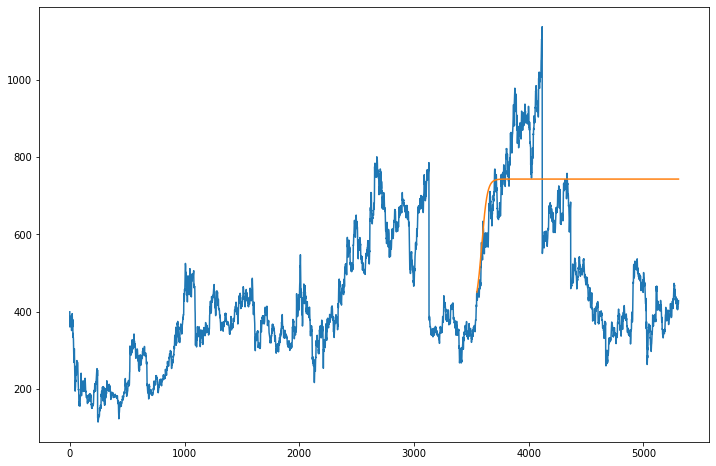

In [26]:
testPredictPlot = np.empty_like(df_VWAP)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (time_step*2) +1:, :] = outputnp

plt.figure(figsize=[12,8])
plt.plot(scaler.inverse_transform(df_VWAP))
plt.plot(scaler.inverse_transform(testPredictPlot))
plt.show()

In [56]:
outputnp_df = pd.DataFrame(outputnp)
test_predict_df = pd.DataFrame(test_predict)

outputnp_df.drop(outputnp_df.index[-1], axis=0, inplace=True)
mape = np.mean(np.abs(test_predict_df - outputnp_df)/np.abs(outputnp_df)) 

print("MAPE", mape)

MAPE 0    0.351739
dtype: float64
